In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


# Load dataset

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Not null value 

In [6]:
# feature management 
tar_col = 'Churn'
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist() 

tar_col , num_col , cat_col 

('Churn',
 ['SeniorCitizen', 'tenure', 'MonthlyCharges'],
 ['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges',
  'Churn'])

- remove label column out of cat_col 

In [7]:
cat_col.remove(tar_col) 

In [8]:
tar_col , num_col , cat_col 

('Churn',
 ['SeniorCitizen', 'tenure', 'MonthlyCharges'],
 ['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges'])

# First Look data

- numerical columns

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- numerical data no null value
- SeniorCitizen have value from 0->1 , mean 0.

- Catergorical columns

In [10]:
cat_data = pd.DataFrame({
    'column_name': cat_col,
    'unique_values': [df[col].nunique() for col in cat_col],
    'sample_values': [df[col].unique()[:5] for col in cat_col],
})
cat_data

,column_name,unique_values,sample_values
0,customerID,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,2,"[Female, Male]"
2,Partner,2,"[Yes, No]"
3,Dependents,2,"[No, Yes]"
4,PhoneService,2,"[No, Yes]"
5,MultipleLines,3,"[No phone service, No, Yes]"
6,InternetService,3,"[DSL, Fiber optic, No]"
7,OnlineSecurity,3,"[No, Yes, No internet service]"
8,OnlineBackup,3,"[Yes, No, No internet service]"
9,DeviceProtection,3,"[No, Yes, No internet service]"


- CustomerID not a feature -> can remove this feature 
- Totalcharge may be a numerical data 

In [11]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [12]:
#  apply casting data type numerical to total charges 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- TotalCharges after casting data type have na 

In [14]:
df['TotalCharges'].isna().sum()

11

- There are 11 nan value in TotalCharges -> need to fill up later

In [15]:
#  remove customeriD and TotalCharges from cat_col 
#  add TotalCharges to num_col 
cat_col.remove('customerID')
cat_col.remove('TotalCharges')
num_col.append('TotalCharges')
cat_col, num_col , tar_col

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],
 'Churn')

# check duplicate record 

In [16]:
duplicated = df.duplicated().sum() 
duplicated

0

- There are no duplicated data

# Check null value in dataset

In [17]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- TotalCharges column have 11 null value -> need to fill up later

In [18]:
single_value_cols = df.columns[df.nunique() <= 1] 
single_value_cols

Index([], dtype='object')

- There are no single value columns

# EDA

## univariate data analysis

- Target column

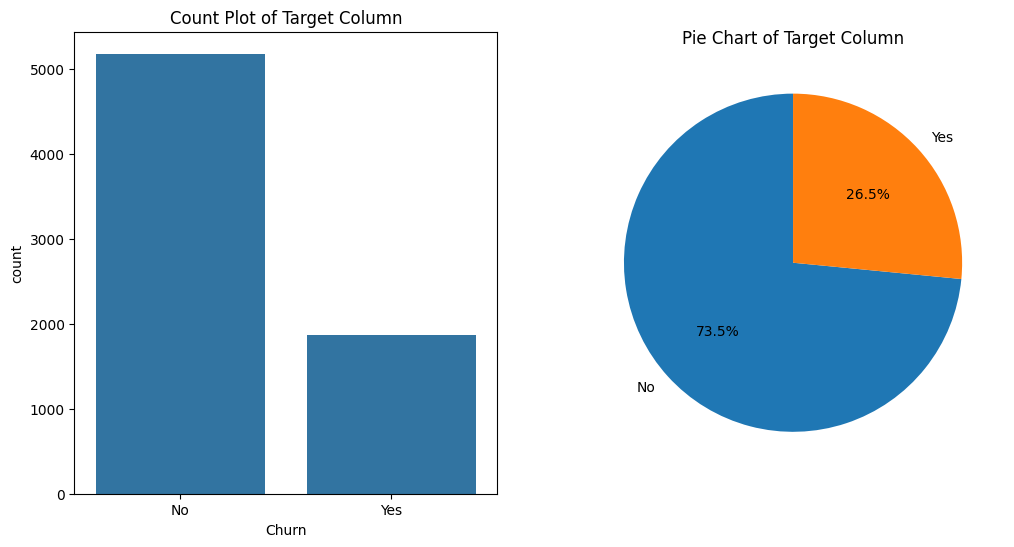

In [19]:
# bar chart and pie chart for target column
fig , axs = plt.subplots(1, 2, figsize=(12, 6)) 
sns.countplot(x=tar_col, data=df, ax=axs[0])
axs[0].set_title('Count Plot of Target Column')
df[tar_col].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], startangle=90)
axs[1].set_ylabel('')
axs[1].set_title('Pie Chart of Target Column')
plt.show()

- There are more no Churn customer than Churn 
- This dataset is imbalance -> may be need to resolve later

- Another columns 

================= gender ================


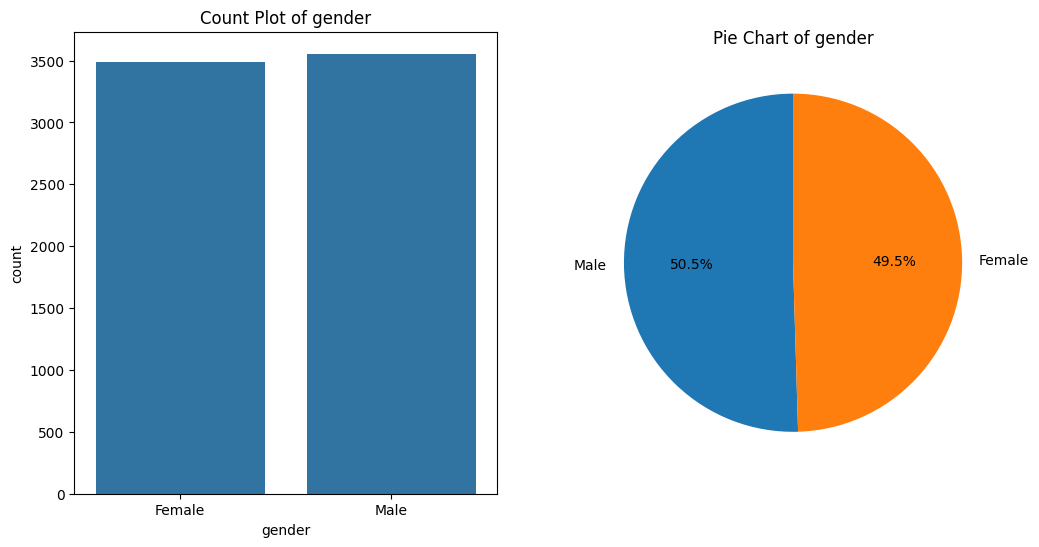

================= Partner ================


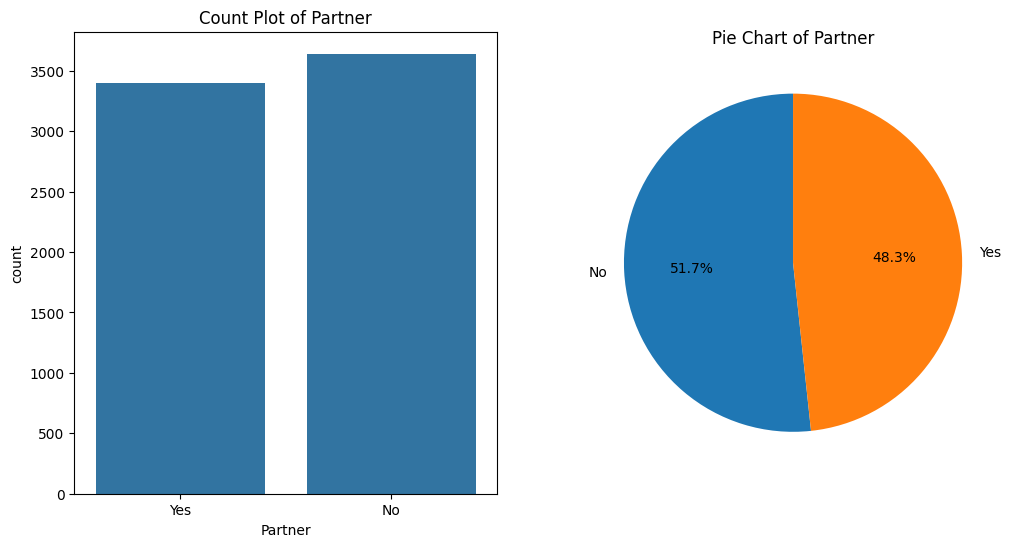

================= Dependents ================


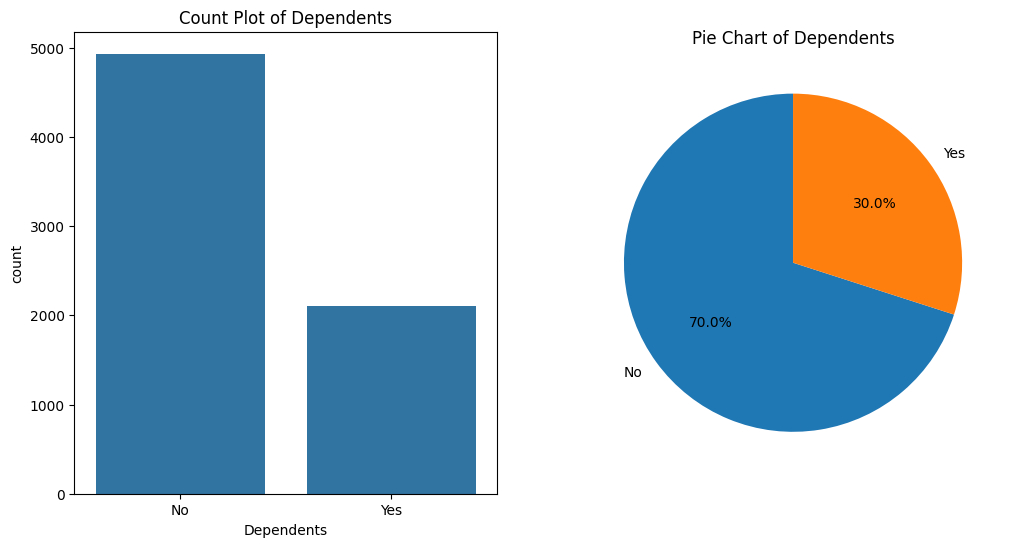

================= PhoneService ================


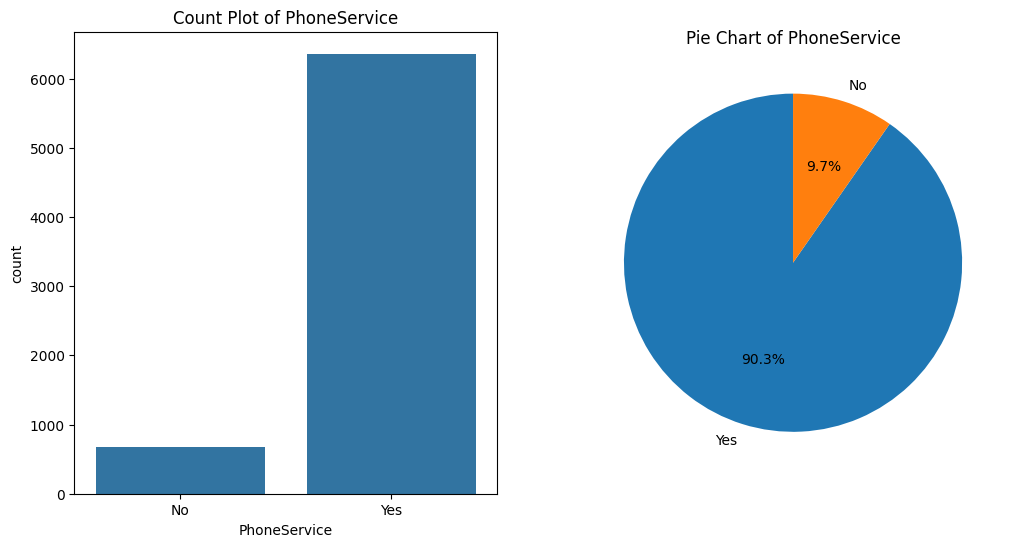

================= MultipleLines ================


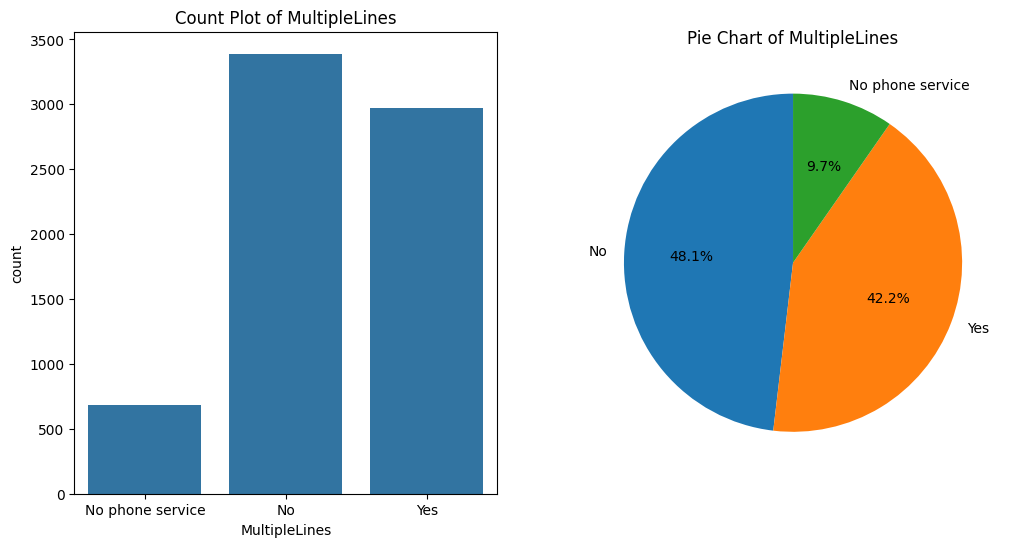

================= InternetService ================


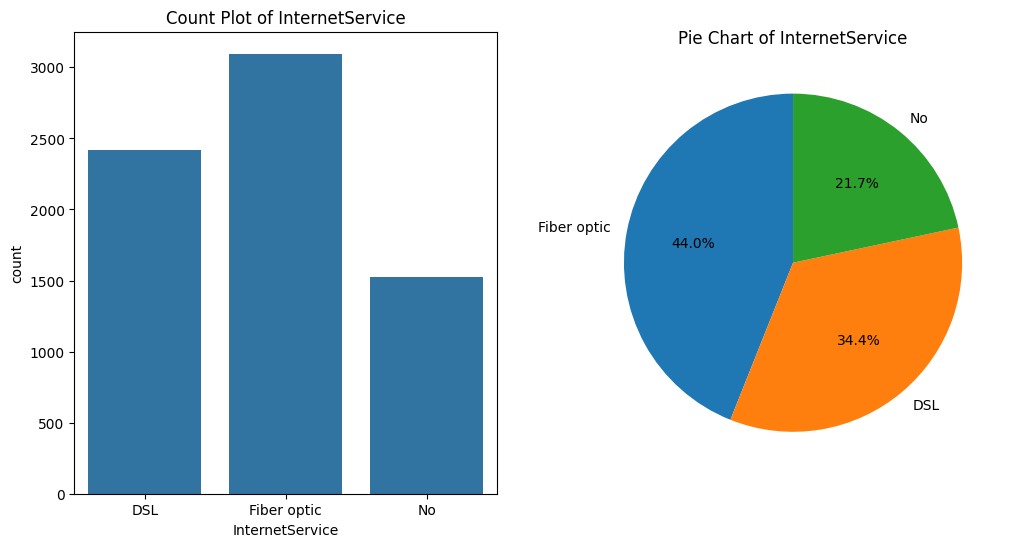

================= OnlineSecurity ================


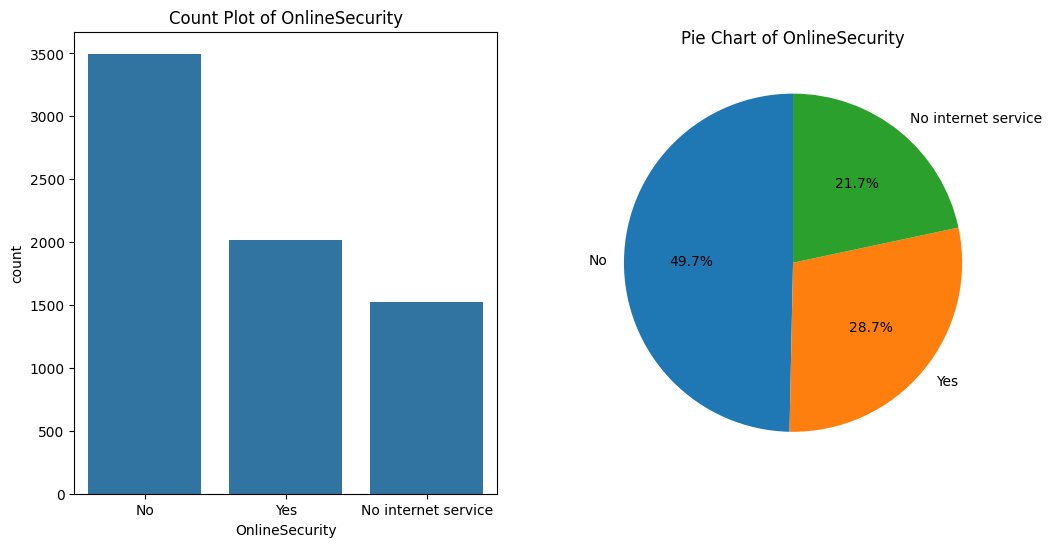

================= OnlineBackup ================


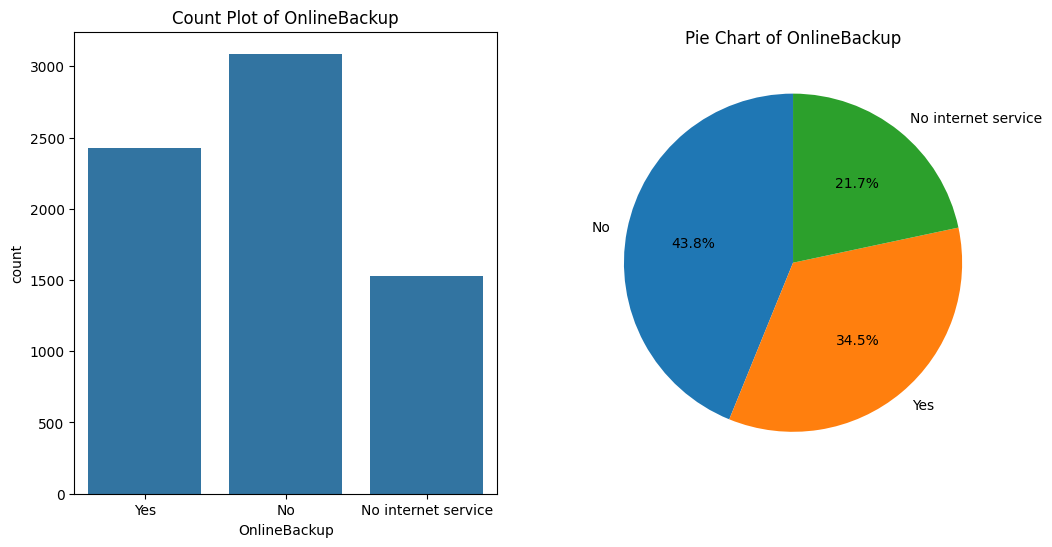

================= DeviceProtection ================


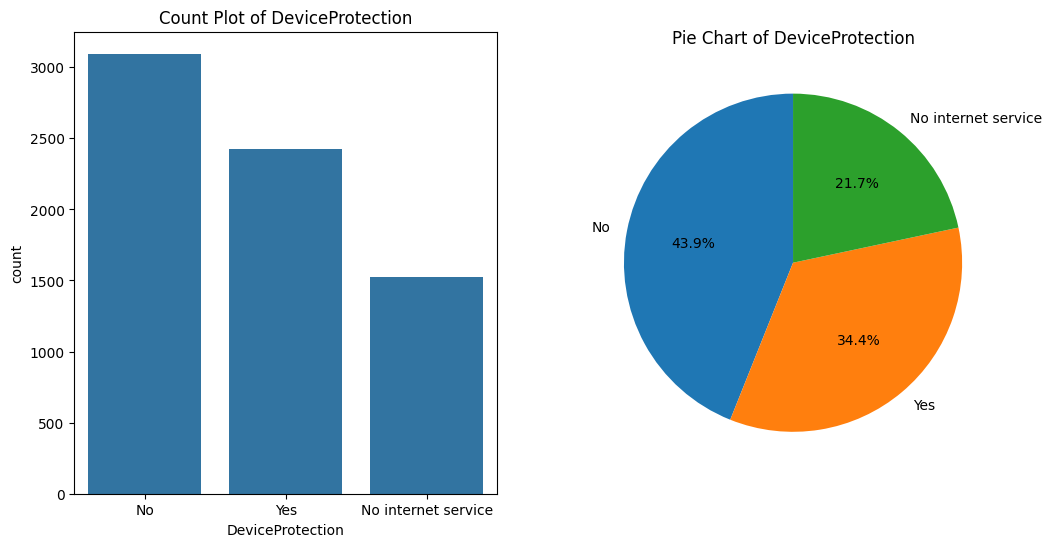

================= TechSupport ================


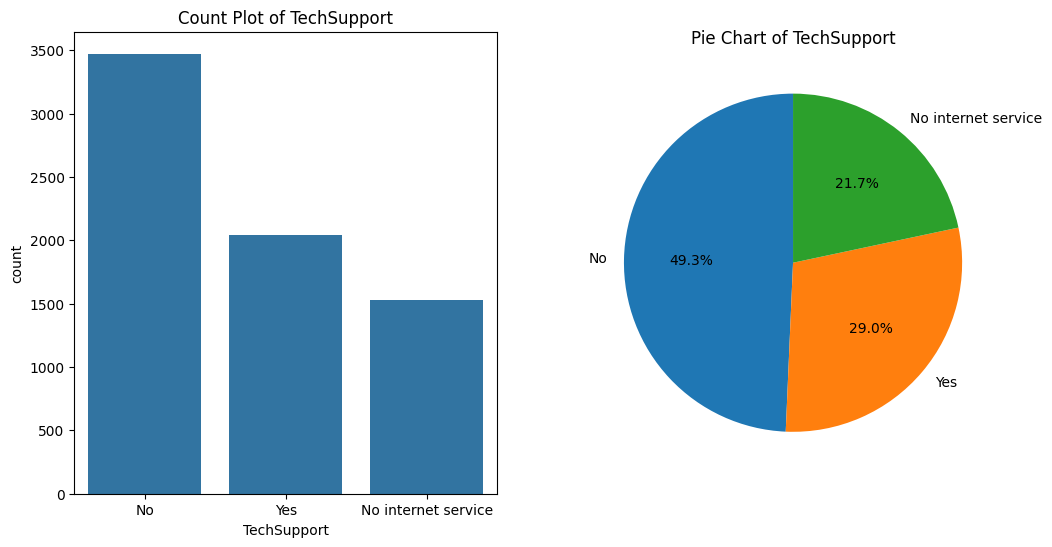

================= StreamingTV ================


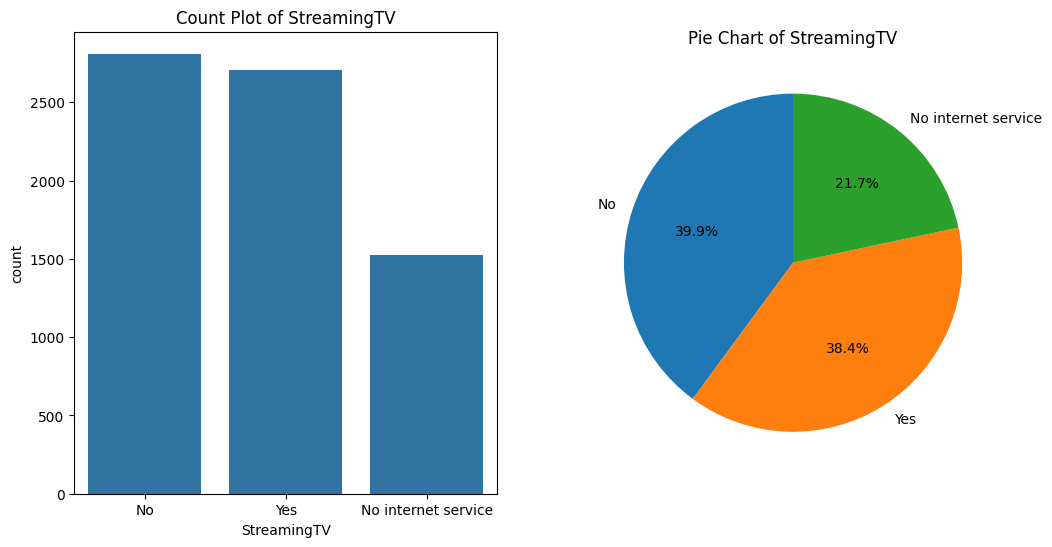

================= StreamingMovies ================


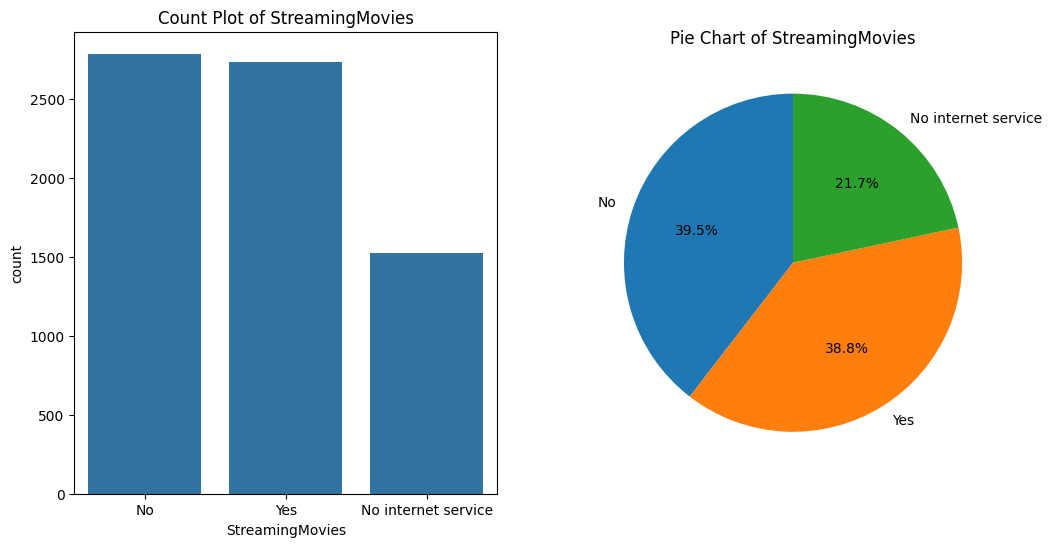

================= Contract ================


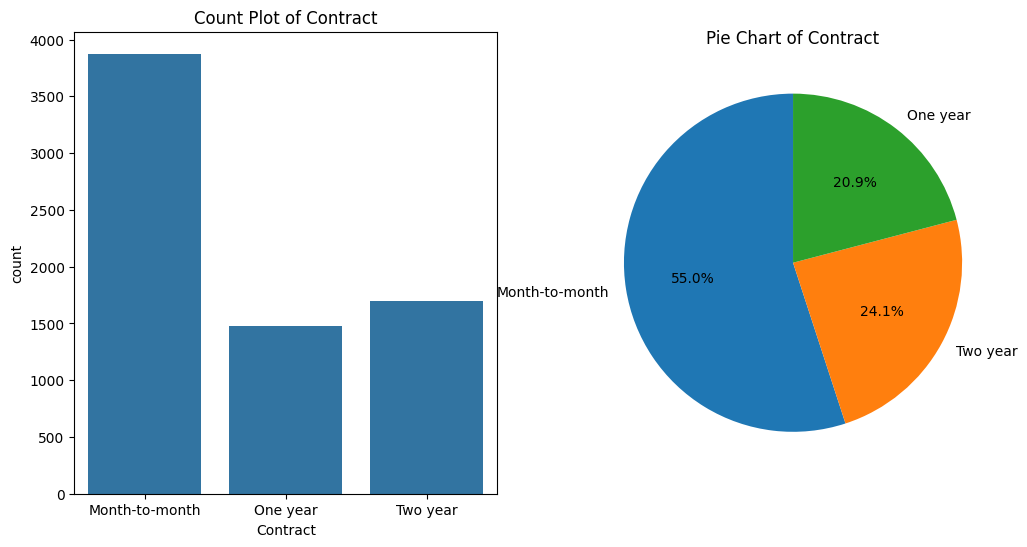

================= PaperlessBilling ================


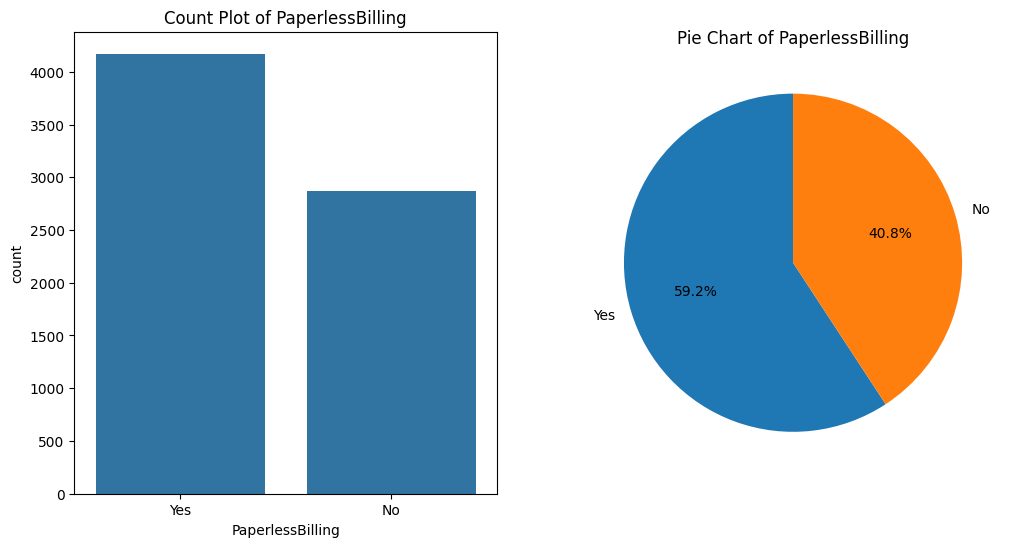

================= PaymentMethod ================


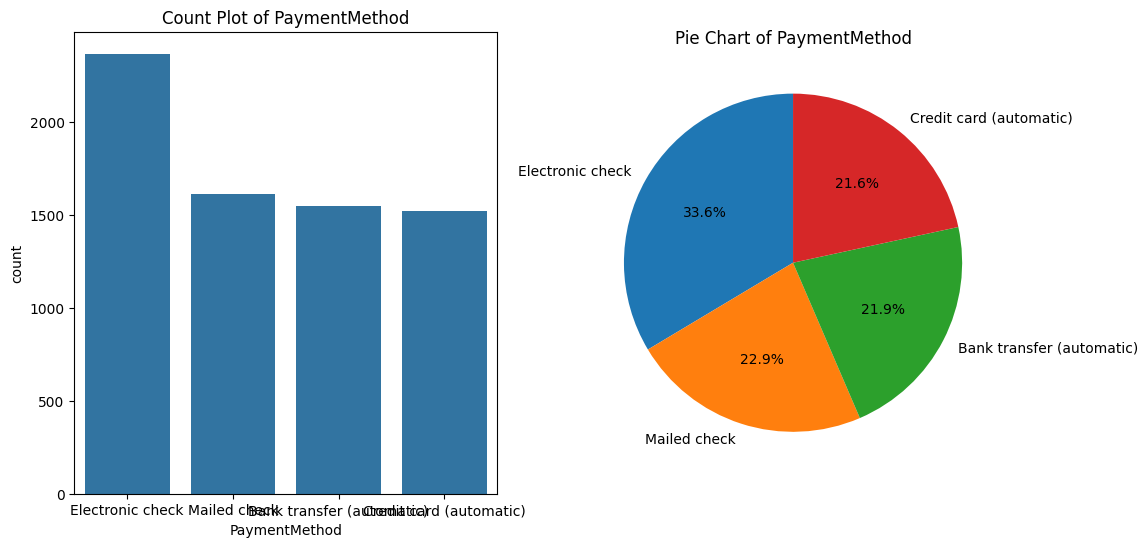

In [20]:
for cat in cat_col:
    
    print(f'================= {cat} ================')
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    sns.countplot(x=cat, data=df, ax=axs[0])
    axs[0].set_title(f'Count Plot of {cat}')
    df[cat].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], startangle=90)
    axs[1].set_ylabel('')
    axs[1].set_title(f'Pie Chart of {cat}')
    plt.show()

- PhoneService is an imbalanced column, with the vast majority of customers having phone service.

- In MultipleLines, the category No phone service is relatively small (~9.7%) and can be considered for grouping with No MultipleLines for simplification.

- Approximately 50% of customers do not have:

    - OnlineSecurity

    - OnlineBackup

    - DeviceProtection

    - TechSupport  
- =>> This may suggest low adoption of add-on services among customers.

- More than half of customers are on month-to-month contracts, which typically indicates lower commitment and higher churn risk.

- Over 50% of customers use paperless billing, which may correlate with digital engagement or cost-saving preferences.

# Numerical data

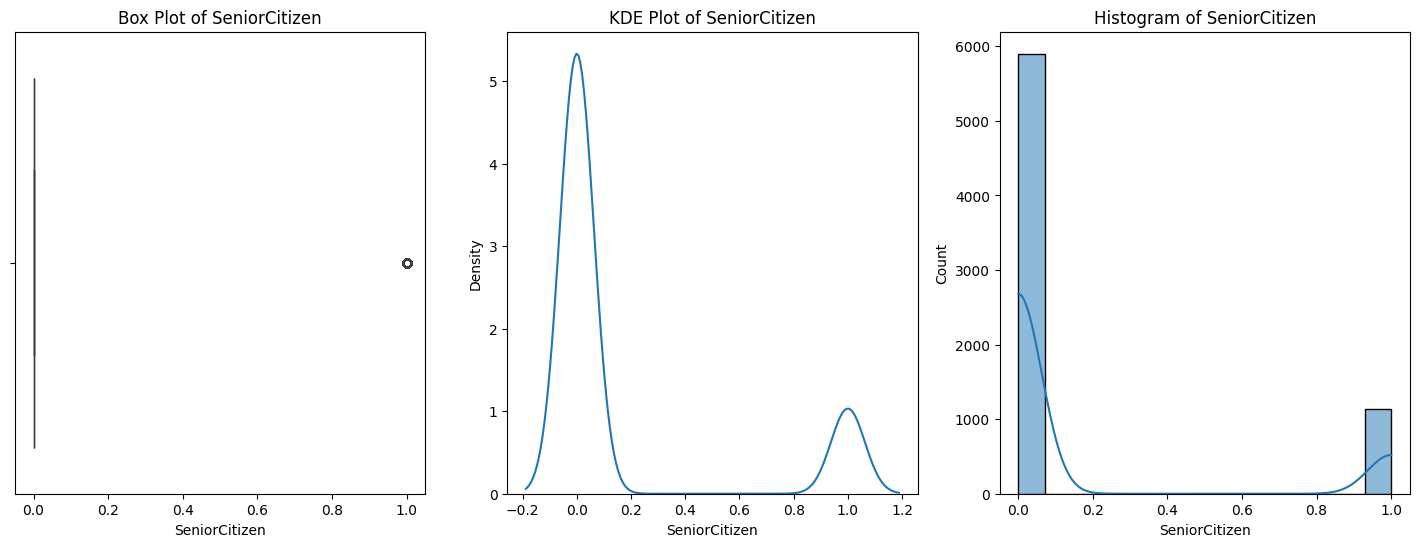

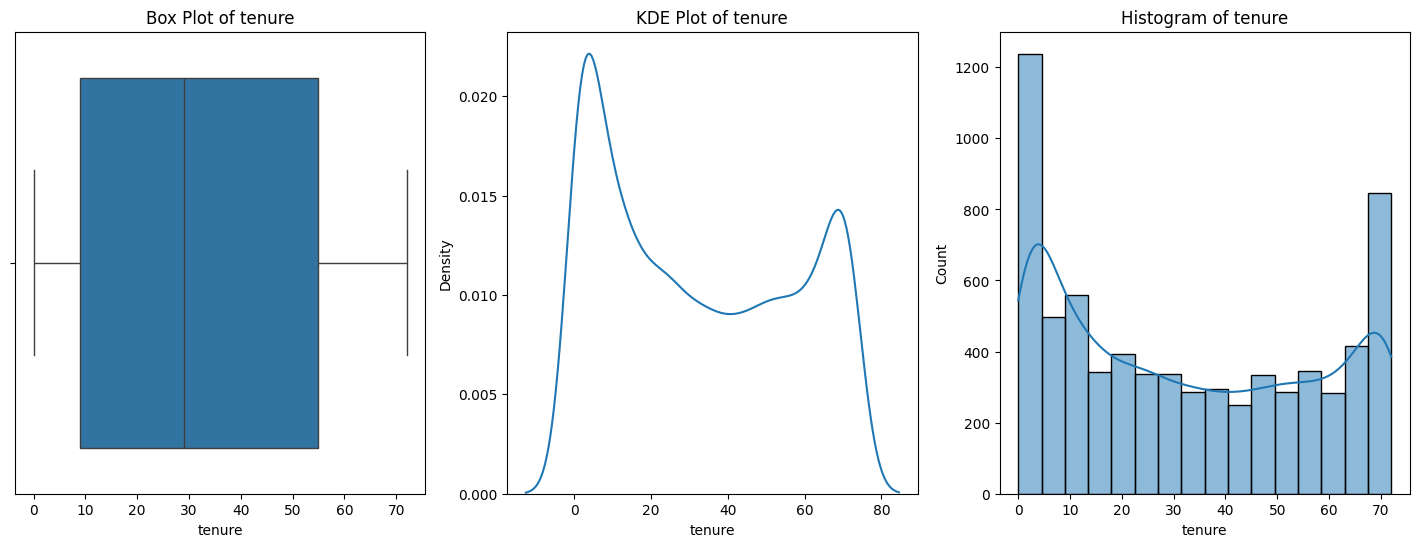

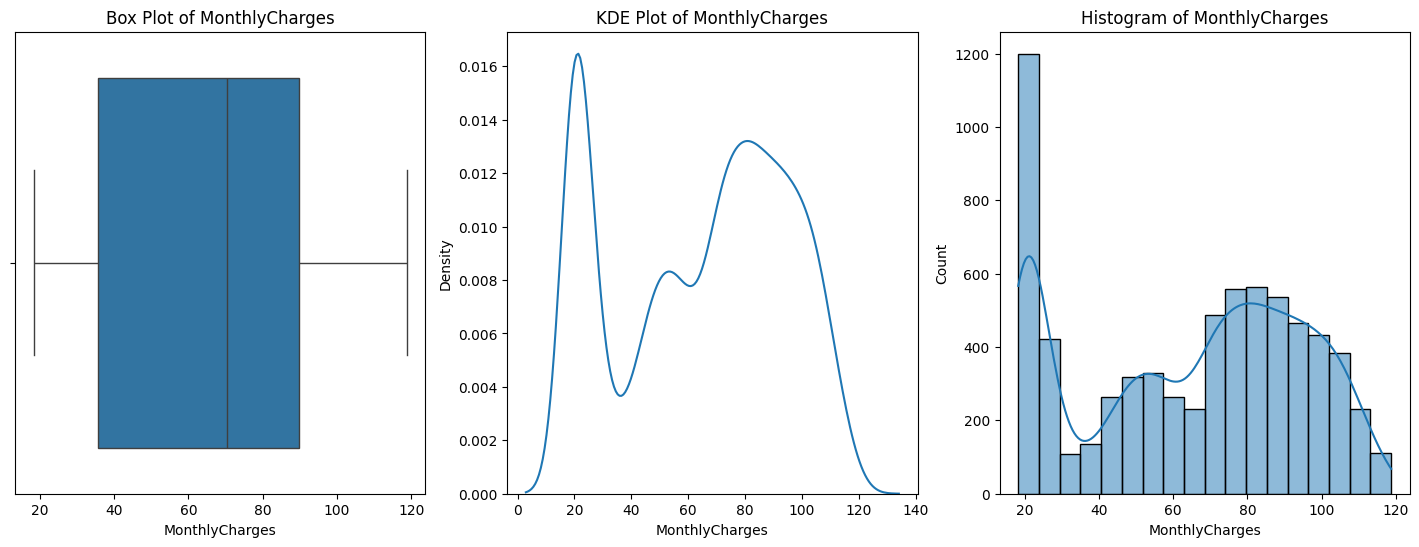

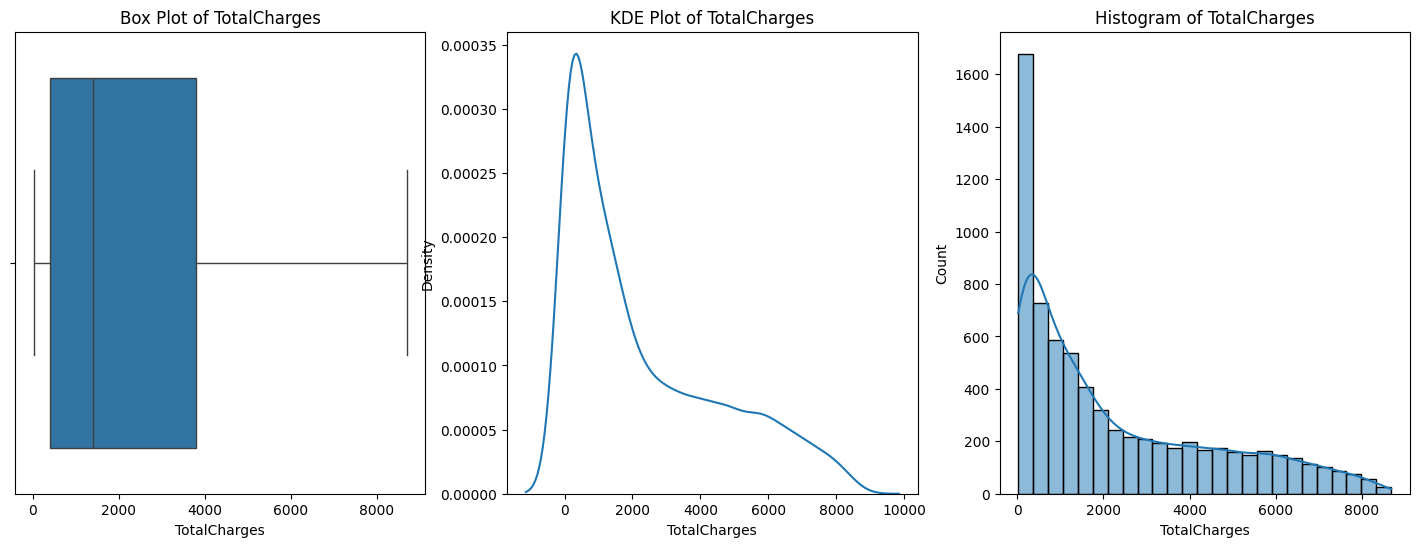

In [21]:
# boxplot , kde , histogram for numerical columns 
for col in num_col:
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.boxplot(x=df[col], ax=axs[0])
    axs[0].set_title(f'Box Plot of {col}')
    
    sns.kdeplot(df[col], ax=axs[1])
    axs[1].set_title(f'KDE Plot of {col}')
    
    sns.histplot(df[col], kde=True, ax=axs[2])
    axs[2].set_title(f'Histogram of {col}')
    
    plt.show()

SeniorCitizen
The SeniorCitizen variable contains only two distinct values: 0 and 1, indicating whether the customer is 65 years or older.

This is a categorical variable that can be used for segmentation and churn analysis.

🔹 Outlier Analysis
Most numerical variables do not contain significant outliers, suggesting that the dataset is well-behaved and does not require heavy outlier treatment during preprocessing.

🔹 Tenure
The distribution of tenure is bimodal, showing two distinct peaks:

The first peak around 10 months suggests that many customers tend to churn early.
👉 Indicates a need to improve customer onboarding and early service experience.

The second peak around 70 months represents a loyal customer group.
👉 These are good targets for retention strategies and upselling.

🔹 MonthlyCharges
MonthlyCharges also shows a bimodal distribution, indicating two main customer segments:

One group pays low monthly charges, likely using basic services.

Another group pays high monthly charges, possibly subscribing to premium or multiple services.
👉 Segmenting based on this can inform differentiated marketing or pricing strategies.

🔹 TotalCharges
As TotalCharges increases, the number of customers decreases.

This is expected, as fewer customers stay long enough or pay consistently to accumulate high total charges.

However, it may also indicate potential churn among mid- to long-term users that needs further investigation.

# Multivariate data analysis

================= gender and Target ================


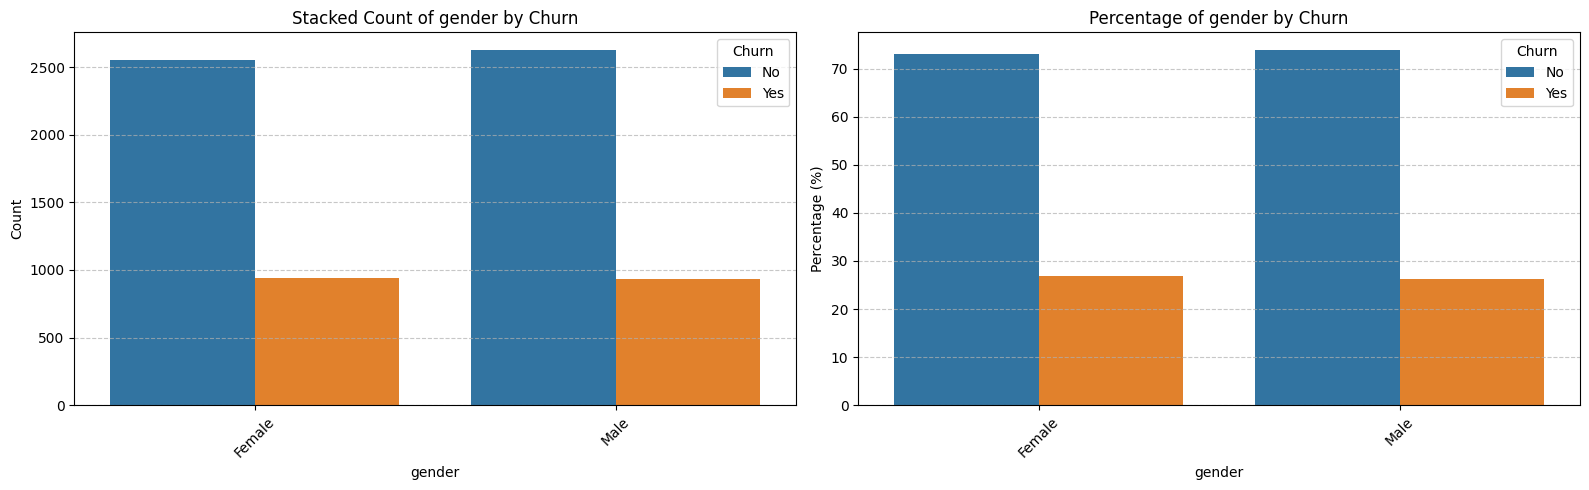

================= Partner and Target ================


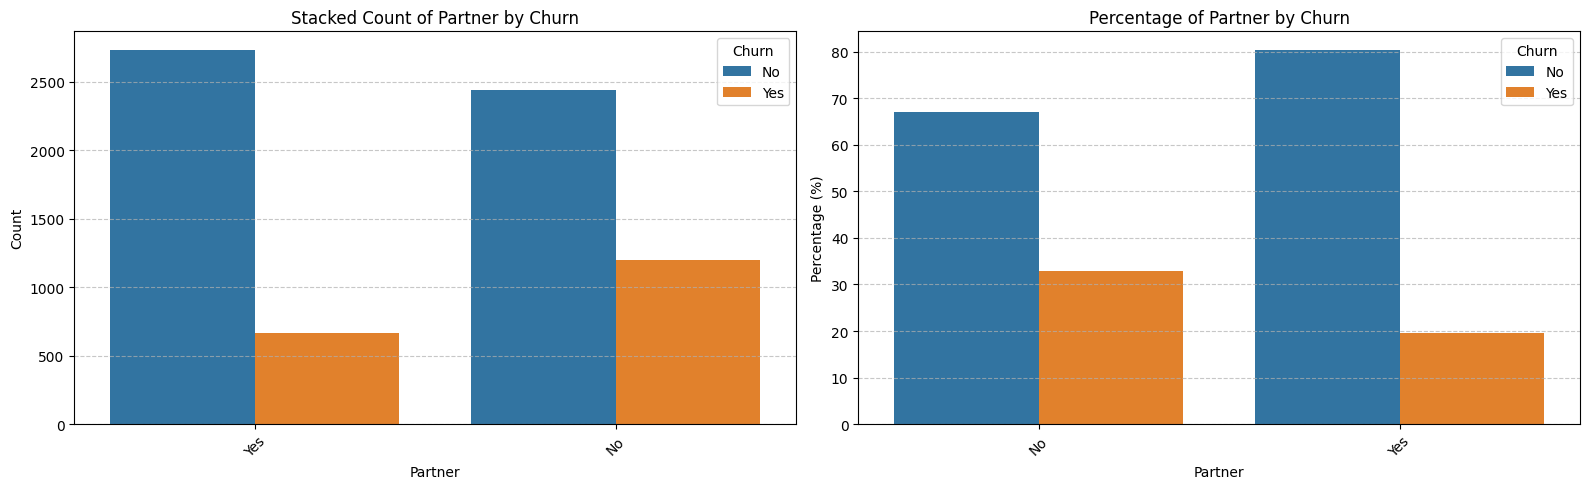

================= Dependents and Target ================


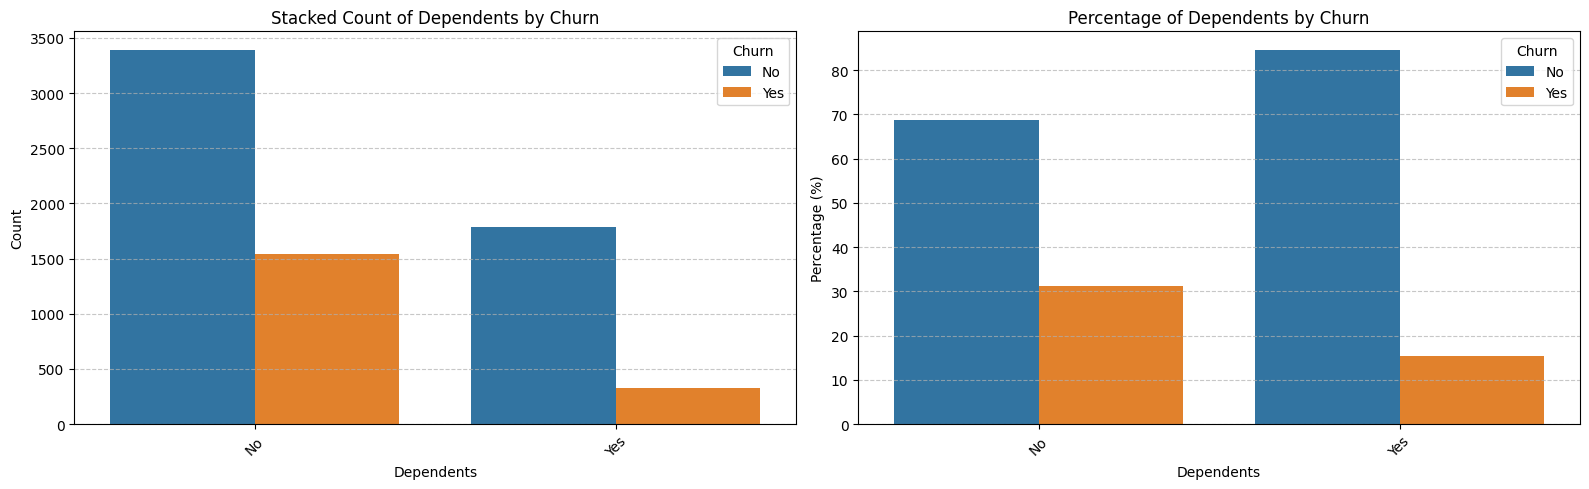

================= PhoneService and Target ================


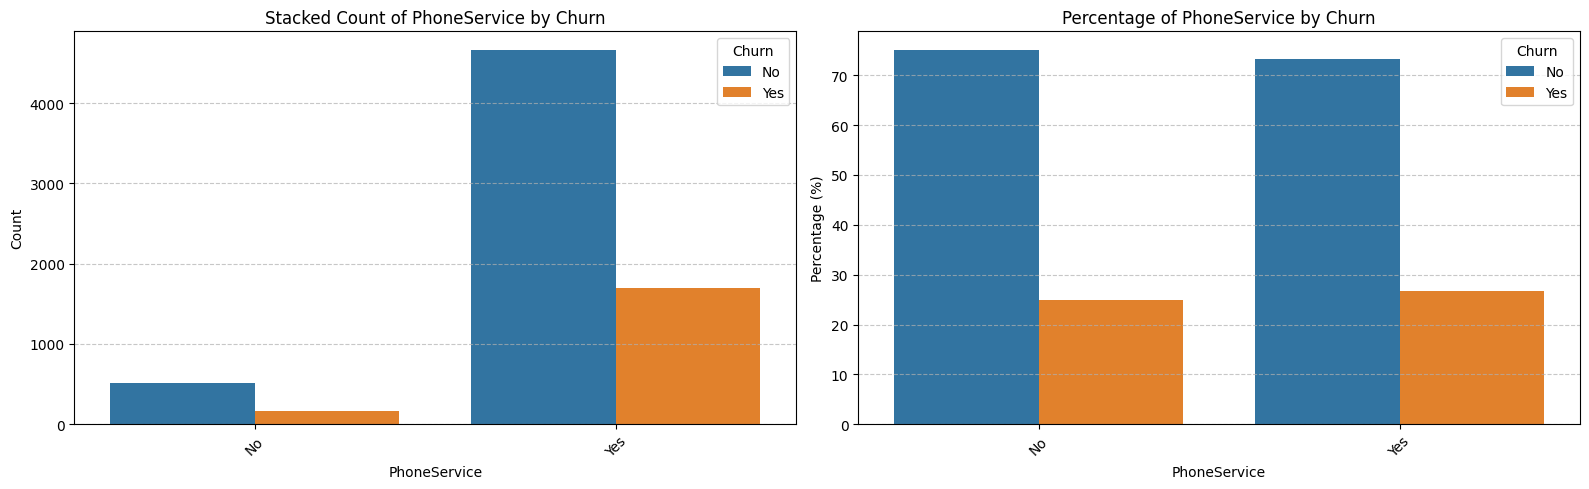

================= MultipleLines and Target ================


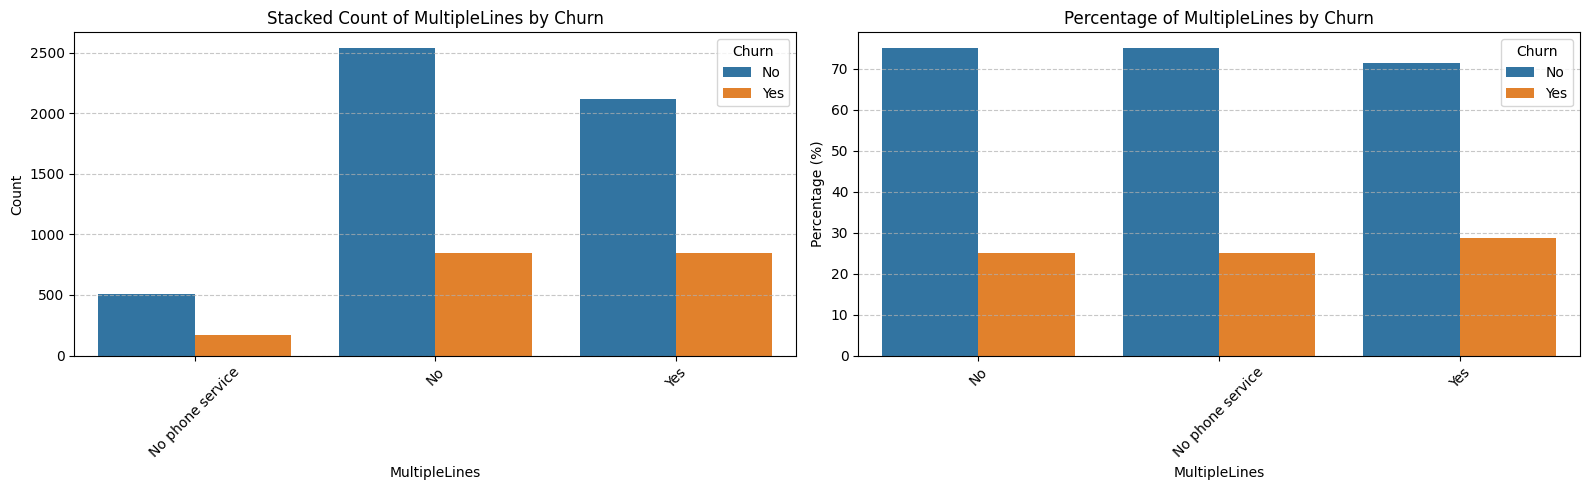

================= InternetService and Target ================


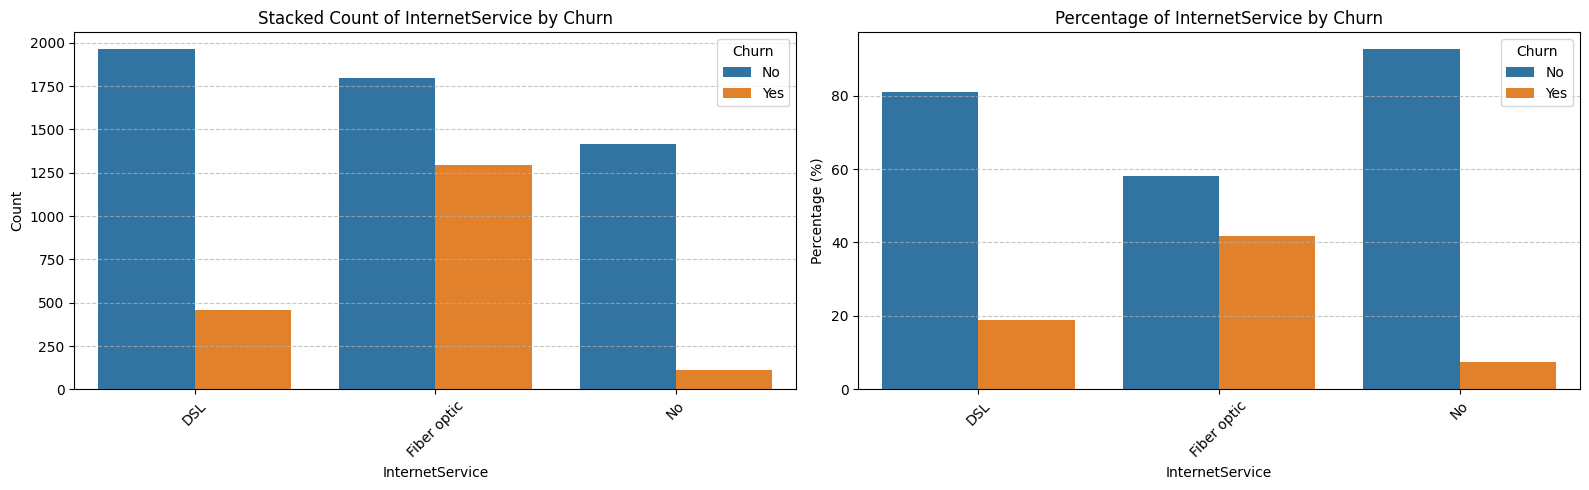

================= OnlineSecurity and Target ================


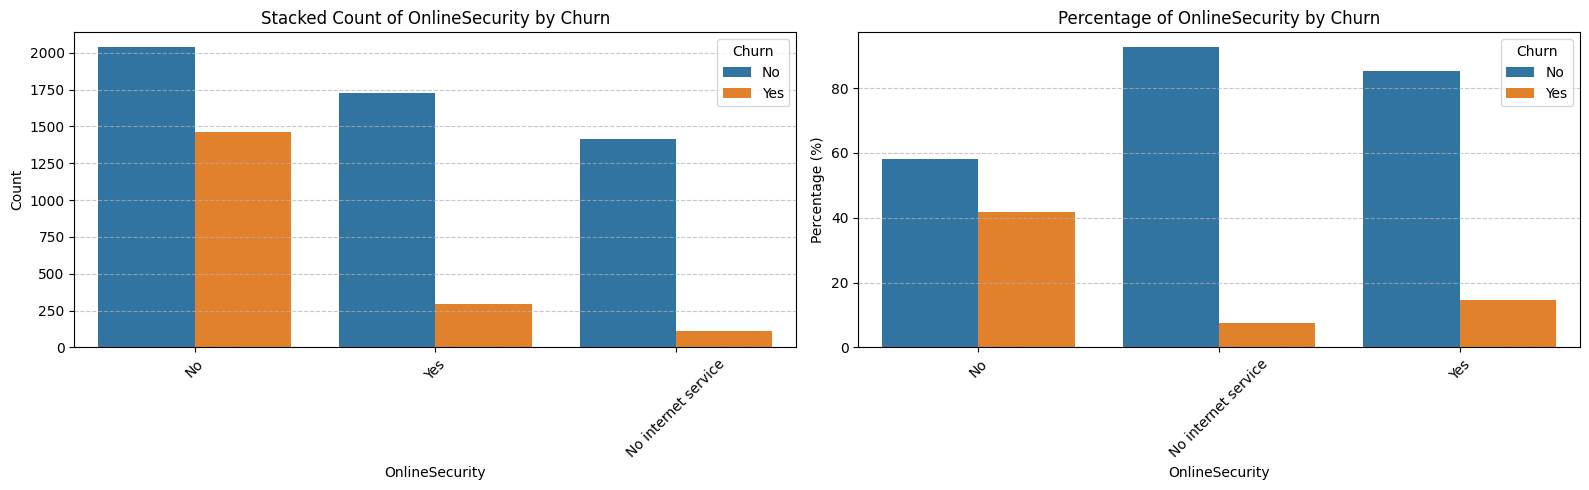

================= OnlineBackup and Target ================


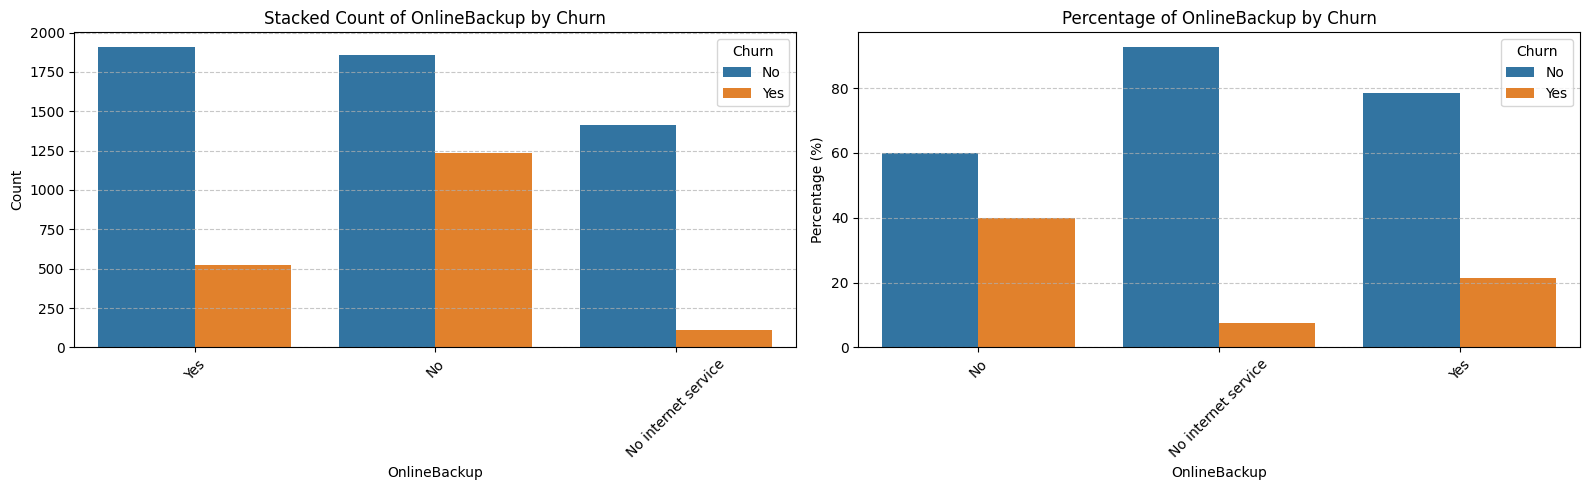

================= DeviceProtection and Target ================


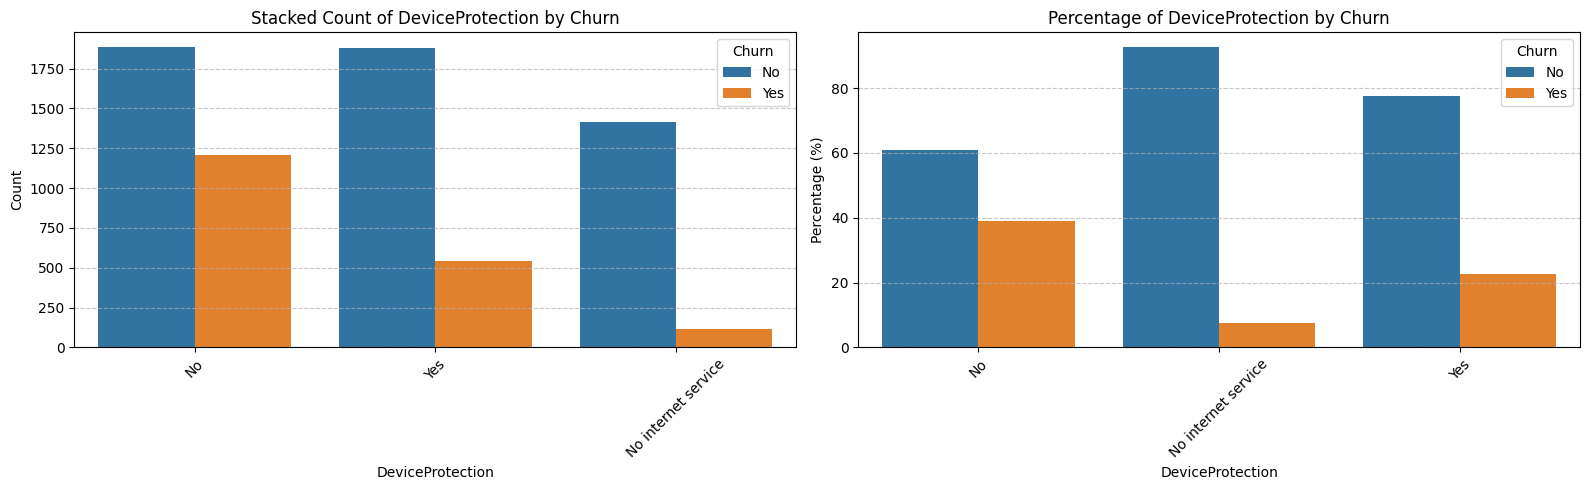

================= TechSupport and Target ================


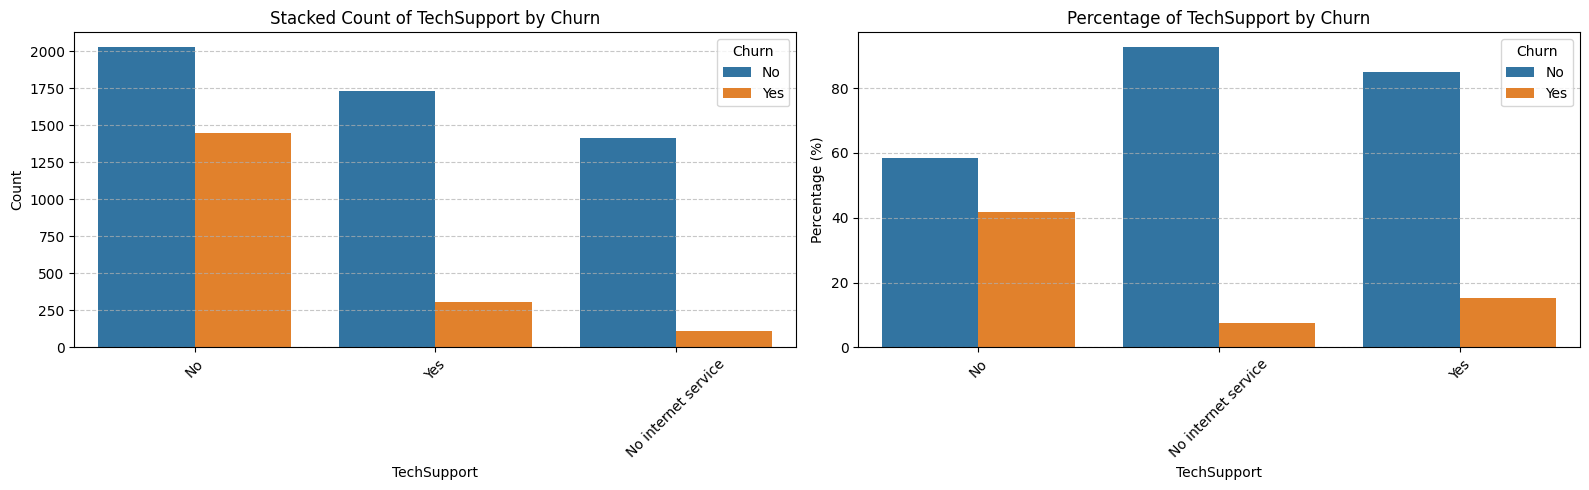

================= StreamingTV and Target ================


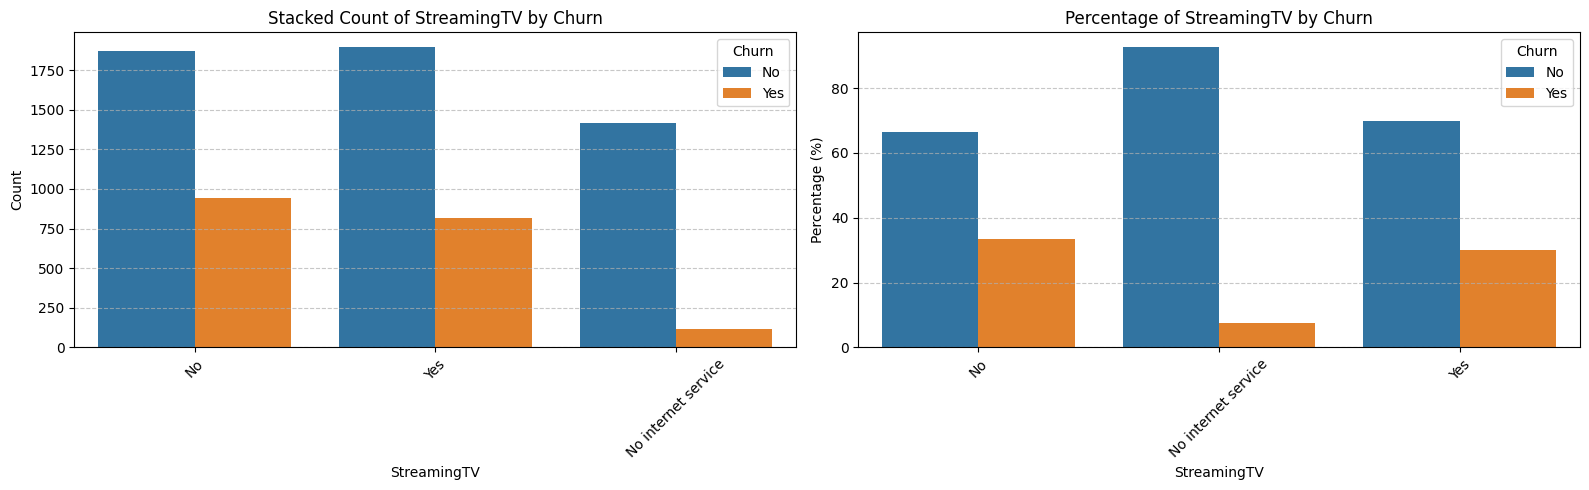

================= StreamingMovies and Target ================


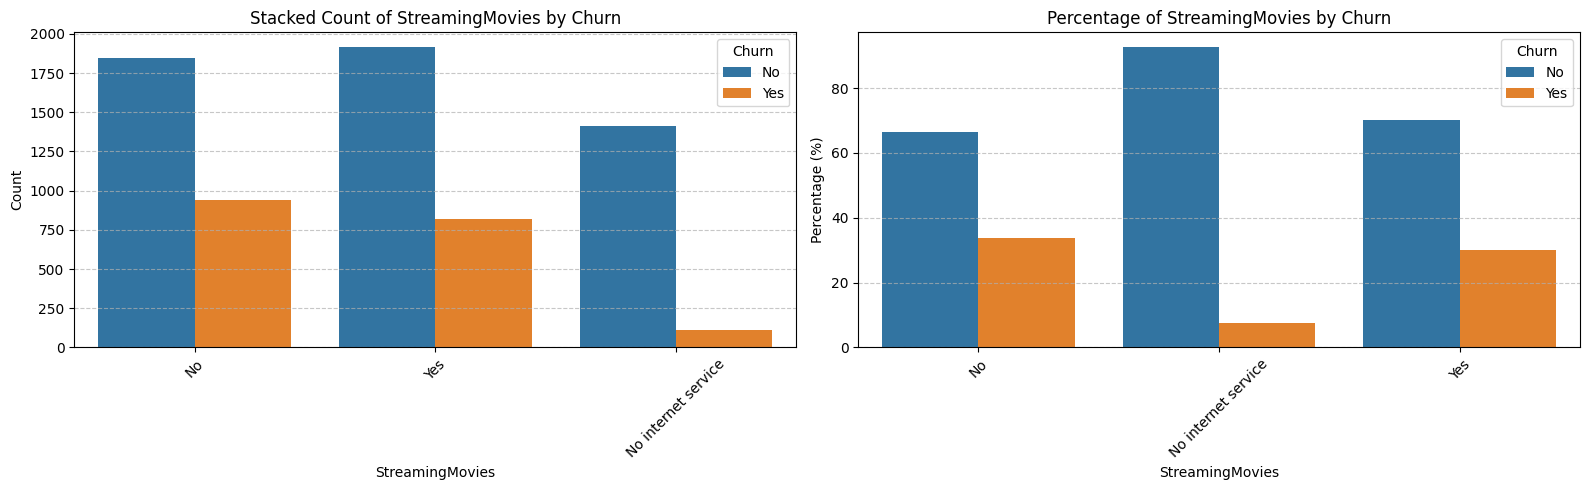

================= Contract and Target ================


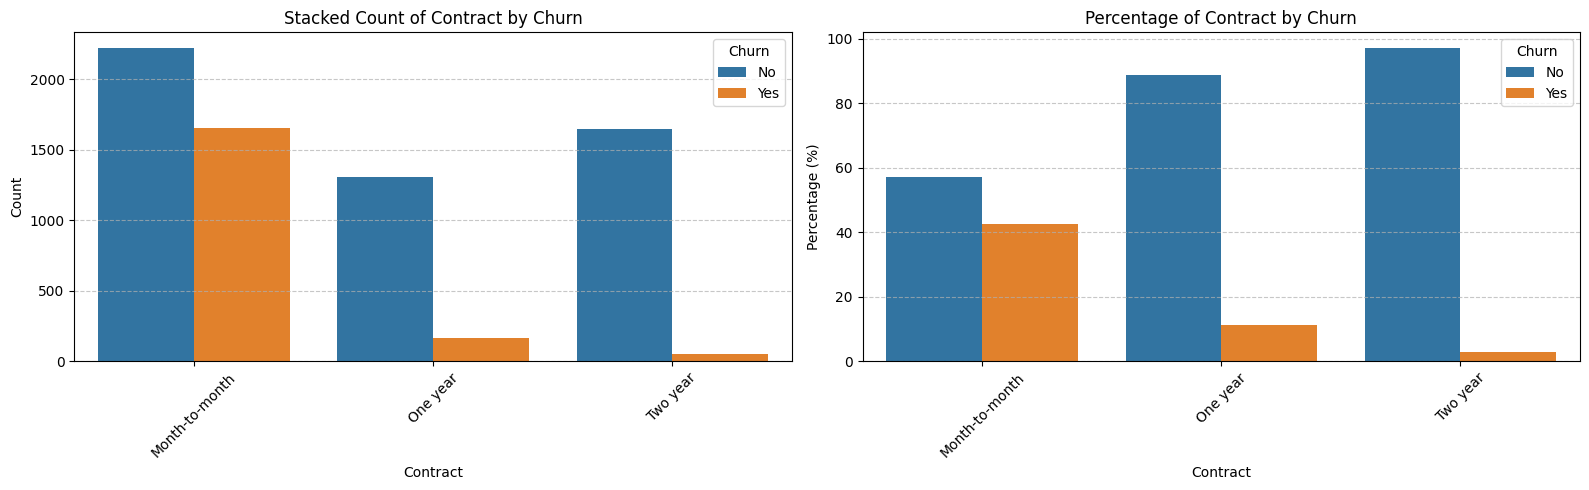

================= PaperlessBilling and Target ================


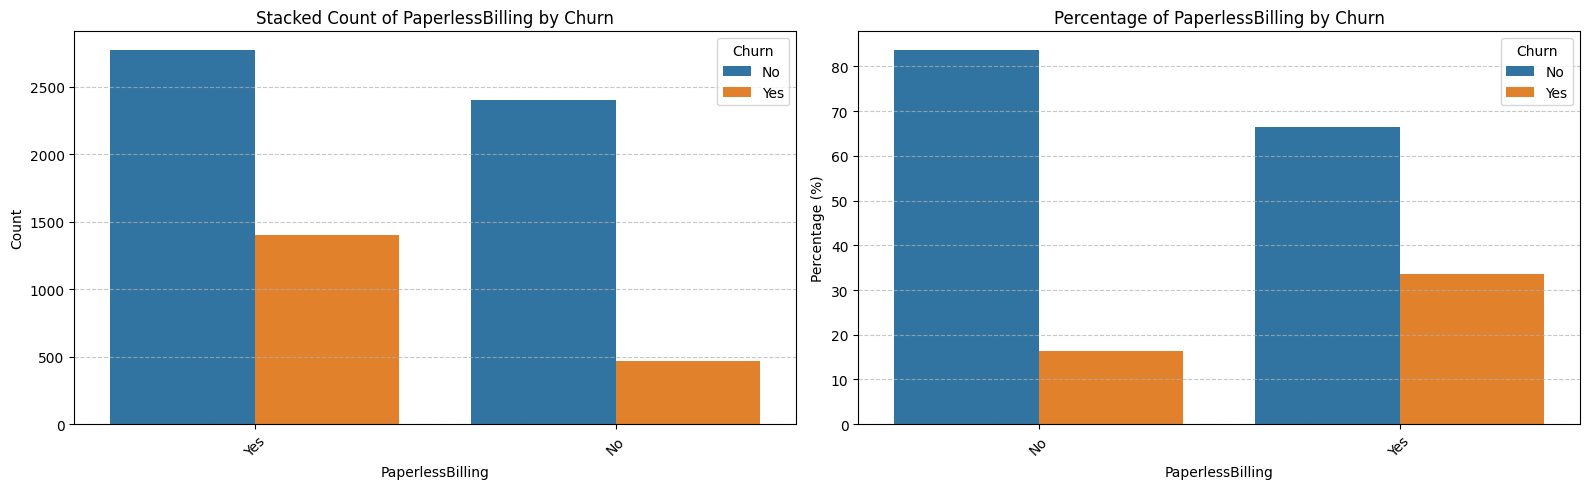

================= PaymentMethod and Target ================


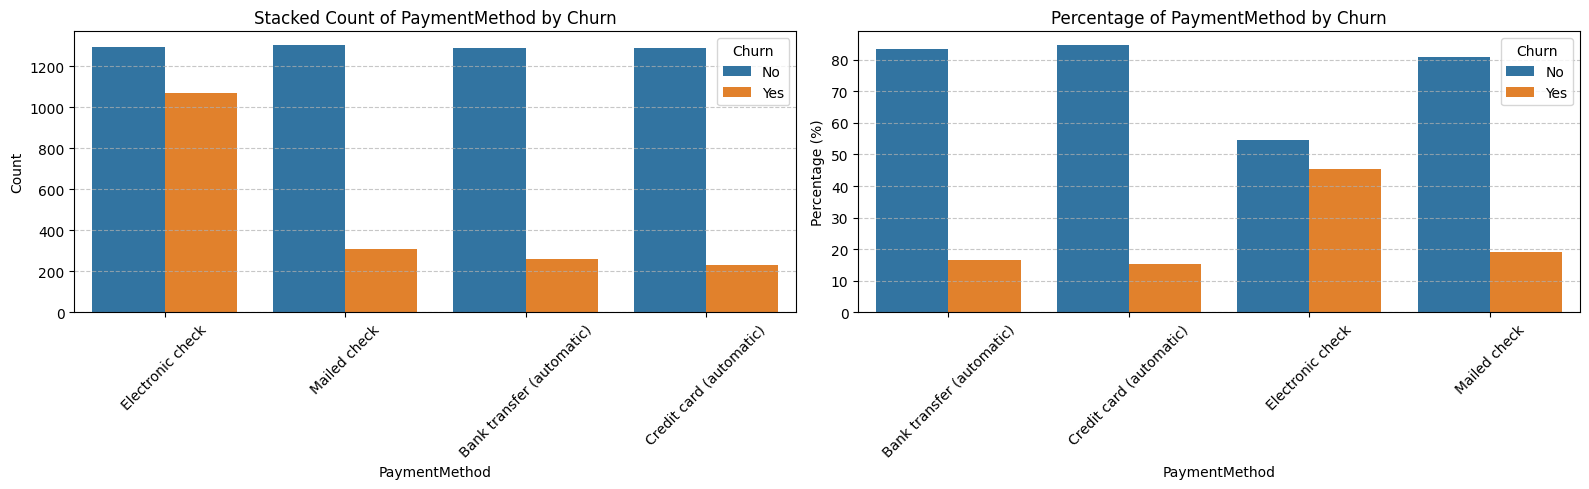

In [22]:
for cat in cat_col:
    print(f'================= {cat} and Target ================')
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 5))
    
    # 1. Stacked Countplot
    sns.countplot(x=cat, hue=tar_col, data=df, ax=axs[0])
    axs[0].set_title(f'Stacked Count of {cat} by {tar_col}')
    axs[0].set_xlabel(cat)
    axs[0].set_ylabel('Count')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].legend(title=tar_col)
    axs[0].grid(axis='y', linestyle='--', alpha=0.7)

    # 2. Percentage bar chart
    pct_data = df.groupby([cat, tar_col]).size().reset_index(name='count')
    pct_total = pct_data.groupby(cat)['count'].transform('sum')
    pct_data['percent'] = pct_data['count'] / pct_total * 100

    sns.barplot(x=cat, y='percent', hue=tar_col, data=pct_data, ax=axs[1])
    axs[1].set_title(f'Percentage of {cat} by {tar_col}')
    axs[1].set_xlabel(cat)
    axs[1].set_ylabel('Percentage (%)')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].legend(title=tar_col)
    axs[1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

1. Customer Profile & Churn Behavior
No Partner or No Dependents:

Customers without a partner and without dependents have a significantly higher churn rate.

This indicates that single or independent customers tend to be less loyal and more likely to leave.

2. Phone Service
While the churn ratio is similar for customers with and without Phone Service (~26–27%), the majority of churned customers come from the group that has Phone Service, due to their larger population size.

Insight:

Having Phone Service does not reduce churn risk.

This segment could be targeted with bundled service improvements or loyalty perks to reduce churn.

3. Internet Service Type
Customers with Fiber Optic Internet have the highest churn rate, over 50%.

Customers with DSL churn less, while those with no Internet service churn very little (around 6%).

Insight:

Fiber Optic users may experience issues (e.g. cost, service quality) and should be prioritized for retention efforts.

Customers without Internet service could be grouped with those not using streaming services due to similar behavior and low churn.

4. Online Services (Security, Backup, Protection, Support)
Customers who do not subscribe to online services (Security, Backup, Device Protection, Tech Support) show very high churn rates – all above 50%.

Insight:

These services may play a critical role in retaining customers.

Encouraging adoption of these add-ons through trials, discounts, or bundles might help reduce churn.

5. Contract Type
Customers with Month-to-Month contracts have the highest churn rate, approximately 88.6%.

Customers with 1-year or 2-year contracts churn significantly less.

Insight:

Contract length is a major churn predictor.

Consider grouping 1-year and 2-year contracts together as “Long-Term” for modeling.

Offer incentives to convert month-to-month users into longer contracts.

6. Billing Preferences
Customers using Paperless Billing show higher churn rates.

Electronic Check is the most common payment method among churned users, accounting for 57.3% of churn.

Insight:

Billing method is correlated with churn.

Consider identifying whether certain billing methods correlate with lower satisfaction or higher churn risk and promote safer options (e.g., credit card, auto-pay).



=============
- Male ,Phone service ,multiple line may be not important feature because all value have the same percent of churn 



# 3 variable

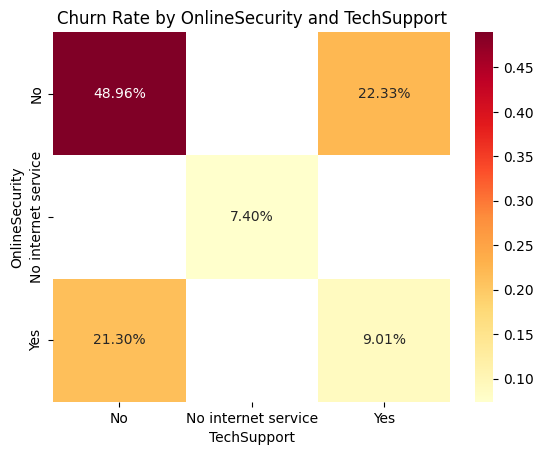

In [23]:
# Tính churn rate theo cặp giá trị
pivot = df.pivot_table(
    index='OnlineSecurity',
    columns='TechSupport',
    values='Churn',
    aggfunc=lambda x: (x == 'Yes').mean()
)

# Vẽ heatmap
sns.heatmap(pivot, annot=True, fmt=".2%", cmap='YlOrRd')
plt.title('Churn Rate by OnlineSecurity and TechSupport')
plt.show()


- numerical data and target

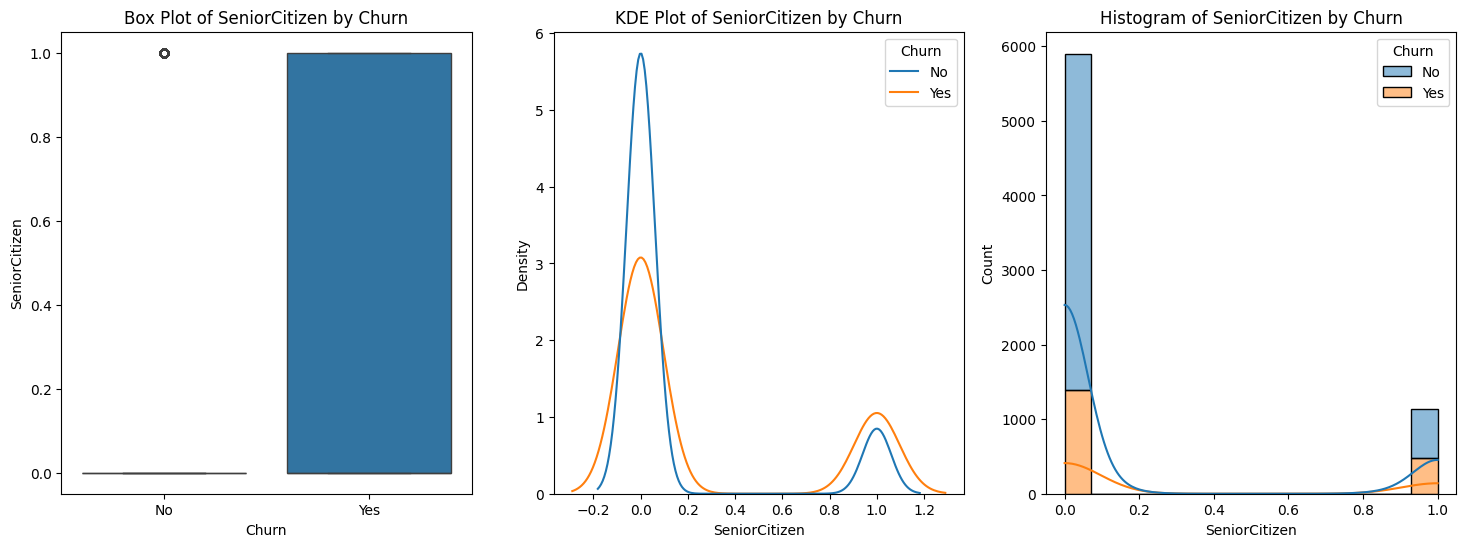

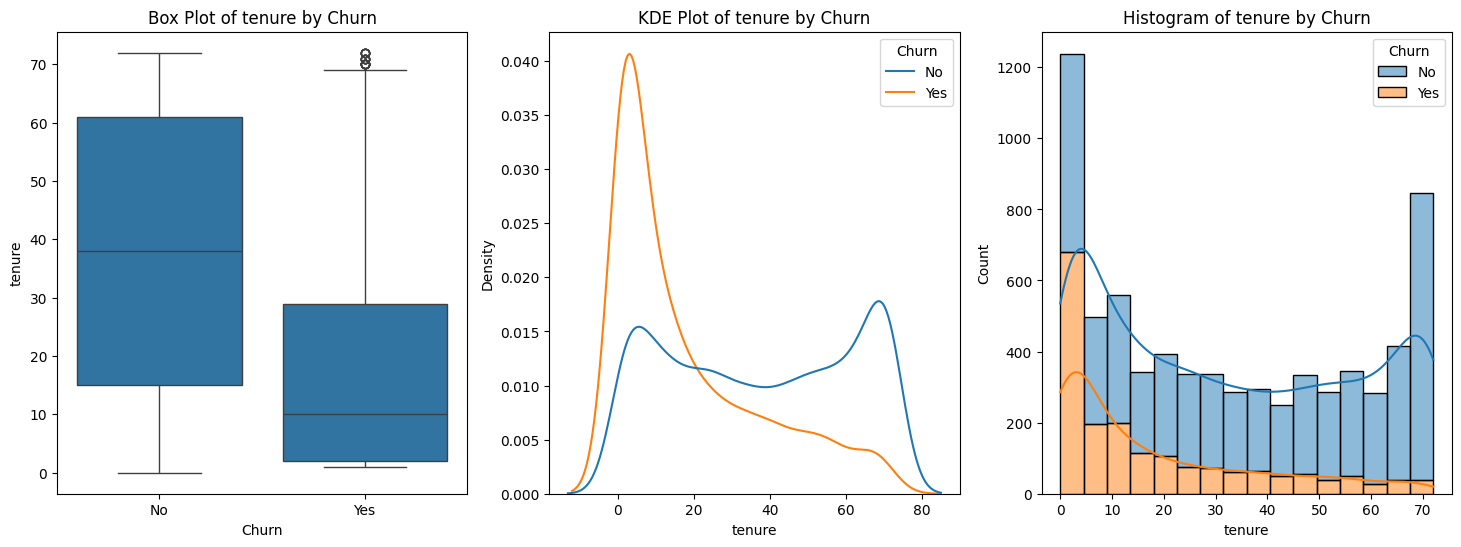

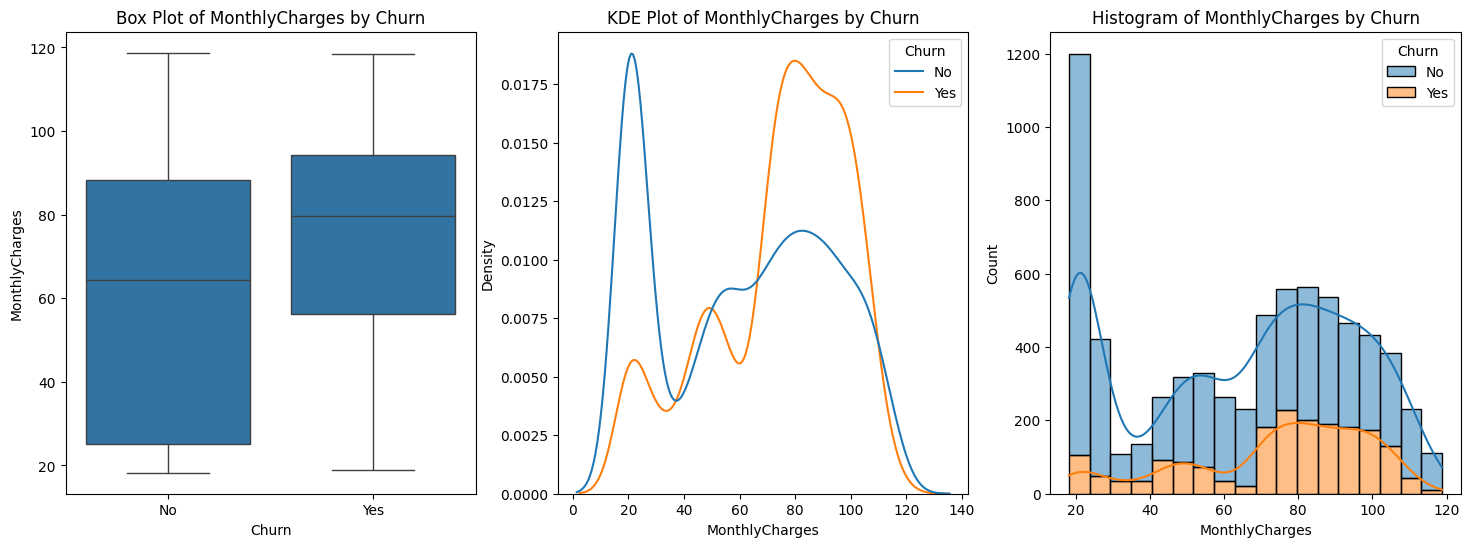

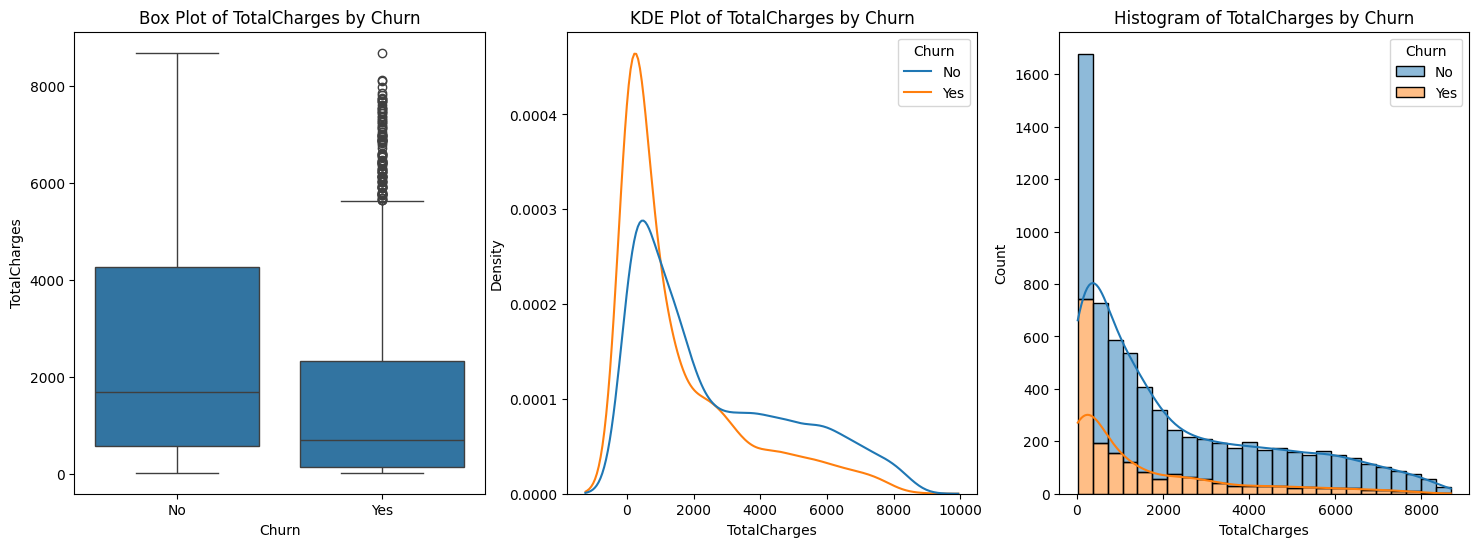

In [24]:
for col in num_col:
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.boxplot(x=tar_col, y=col, data=df, ax=axs[0])
    axs[0].set_title(f'Box Plot of {col} by {tar_col}')
    
    sns.kdeplot(data=df, x=col, hue=tar_col, common_norm=False, ax=axs[1])
    axs[1].set_title(f'KDE Plot of {col} by {tar_col}')
    
    sns.histplot(data=df, x=col, hue=tar_col, multiple='stack', kde=True, ax=axs[2])
    axs[2].set_title(f'Histogram of {col} by {tar_col}')
    
    plt.show()

- high tenure Low churn 
- low tenure high churn 
	- => the more tenure the lower churn 
- Churn most in tenure from 0 to 12 -> must have a strategy for this segment


- Monthly charge high -> high churn 
- most churn in 70 - 100 


# Prepare data for ML 

In [25]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [26]:
tar_col  , num_col , cat_col

('Churn',
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],
 ['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

In [27]:
df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

# Experiment 1: Scale , up sampling no feature engineering Try with Logistic and XGboost

In [28]:
df[cat_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
dtypes: object(15)
memory usage: 825.5+ KB


In [29]:
#  encode label encoding for target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[tar_col] = le.fit_transform(df[tar_col])
df[tar_col]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [ ]:
#  split dataset into train and test sets
from sklearn.model_selection import train_test_split


X = df.drop(columns=[tar_col])
y = df[tar_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 



In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 20), (1409, 20), (5634,), (1409,))

In [42]:
# create pipline for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer 

# numerical and cat columns 
num_features = num_col.copy()
cat_features = cat_col.copy()

# create numerical pipeline
num_pipline = Pipeline([
    ('imputer' , SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#  categorical pipeline 
cat_pipline = Pipeline([
    ('imputer' , SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))    
])


preprocessor = ColumnTransformer([
    ('num' , num_pipline, num_features),
    ('cat', cat_pipline, cat_features)
]
)
preprocessor
    


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [43]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

full_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(random_state=42)),
])
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('sampler', SMOTE(random_state=42))])

In [45]:
#  fit the pipeline
X_resampled, y_resampled = full_pipeline.fit_resample(X_train, y_train)

X_resampled , y_resampled


(array([[-0.44177295,  0.10237124, -0.52197565, ...,  0.        ,
          1.        ,  0.        ],
        [-0.44177295, -0.71174346,  0.33747781, ...,  0.        ,
          0.        ,  1.        ],
        [-0.44177295, -0.79315493, -0.80901319, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [-0.44177295,  0.4525307 ,  1.19996308, ...,  0.        ,
          1.        ,  0.        ],
        [-0.44177295, -1.23175987,  0.36096367, ...,  0.        ,
          1.        ,  0.        ],
        [-0.44177295, -0.95289791, -0.65071961, ...,  0.        ,
          0.        ,  0.        ]]),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 8273    1
 8274    1
 8275    1
 8276    1
 8277    1
 Name: Churn, Length: 8278, dtype: int32)

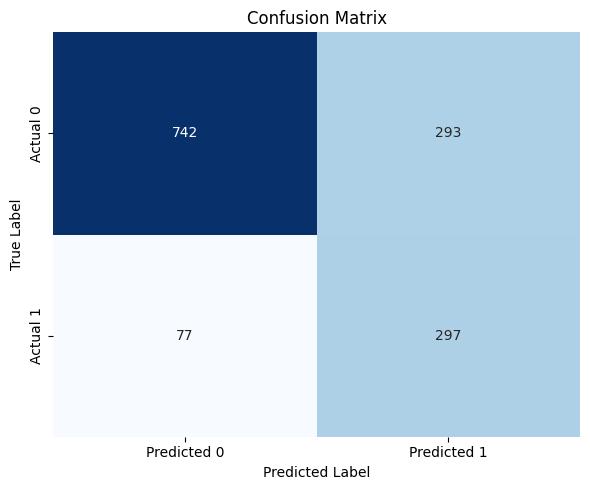


📋 Classification Report:

              precision    recall  f1-score   support

           0     0.9060    0.7169    0.8004      1035
           1     0.5034    0.7941    0.6162       374

    accuracy                         0.7374      1409
   macro avg     0.7047    0.7555    0.7083      1409
weighted avg     0.7991    0.7374    0.7515      1409



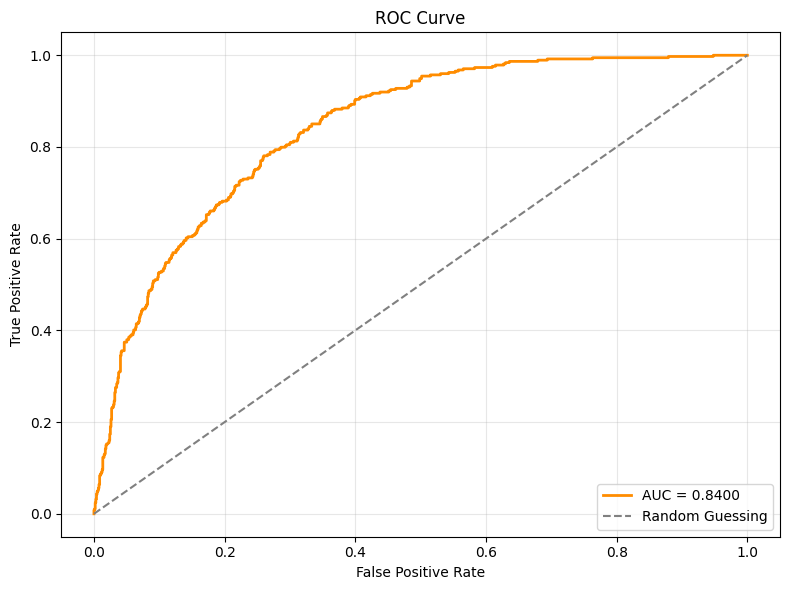

✅ Accuracy Score: 0.7374
✅ ROC-AUC Score: 0.8400


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)

# Train model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_resampled, y_resampled)

# Predict
X_test_processed = preprocessor.transform(X_test)
y_pred = log_reg.predict(X_test_processed)
y_prob = log_reg.predict_proba(X_test_processed)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Classification report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Accuracy
print(f"✅ Accuracy Score: {accuracy:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")


- No upsampling 

In [50]:
preprocessor.fit(X_train) 
X_train_tf = preprocessor.transform(X_train) 
model = LogisticRegression()
model.fit(X_train_tf, y_train) 

LogisticRegression()

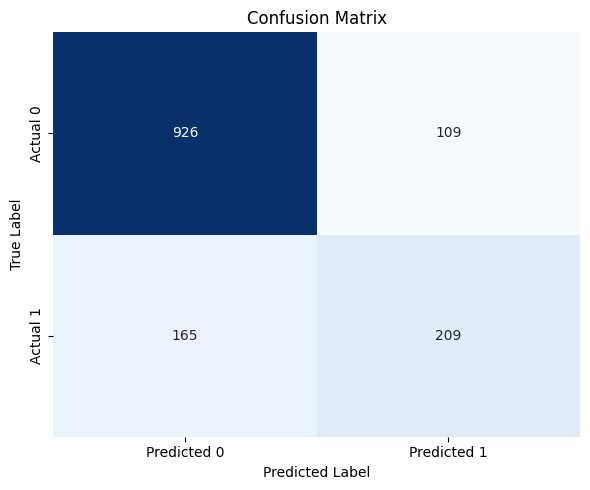


📋 Classification Report:

              precision    recall  f1-score   support

           0     0.8488    0.8947    0.8711      1035
           1     0.6572    0.5588    0.6040       374

    accuracy                         0.8055      1409
   macro avg     0.7530    0.7268    0.7376      1409
weighted avg     0.7979    0.8055    0.8002      1409



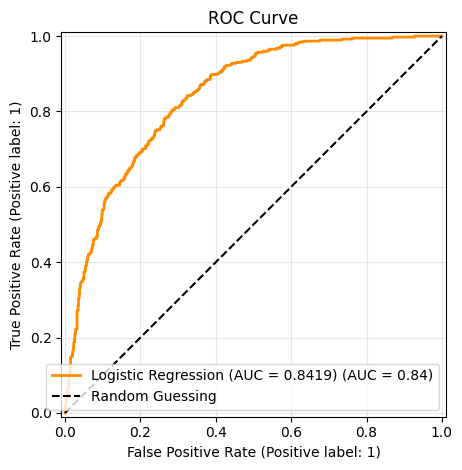

✅ Accuracy Score: 0.8055
✅ ROC-AUC Score: 0.8419


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_auc_score, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Fit model WITHOUT SMOTE -----
model = LogisticRegression(max_iter=1000, random_state=42)
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
model.fit(X_train_proc, y_train)

# ----- Predict -----
y_pred = model.predict(X_test_proc)
y_pred_proba = model.predict_proba(X_test_proc)[:, 1]

# ----- Evaluation -----
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

# ----- Confusion Matrix -----
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ----- Classification Report -----
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# ----- ROC Curve -----
RocCurveDisplay.from_predictions(y_test, y_pred_proba,
                                 name=f"Logistic Regression (AUC = {roc_auc:.4f})",
                                 color="darkorange",
                                 linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ----- Accuracy & AUC -----
print(f"✅ Accuracy Score: {accuracy:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")


- Try with xgboost without smote

In [55]:

import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_proc, y_train)


c:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:32:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

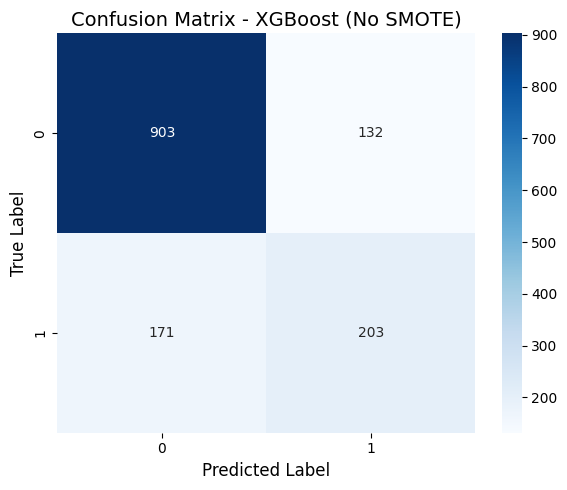


📊 Classification Report:

              precision    recall  f1-score   support

           0     0.8408    0.8725    0.8563      1035
           1     0.6060    0.5428    0.5726       374

    accuracy                         0.7850      1409
   macro avg     0.7234    0.7076    0.7145      1409
weighted avg     0.7785    0.7850    0.7810      1409



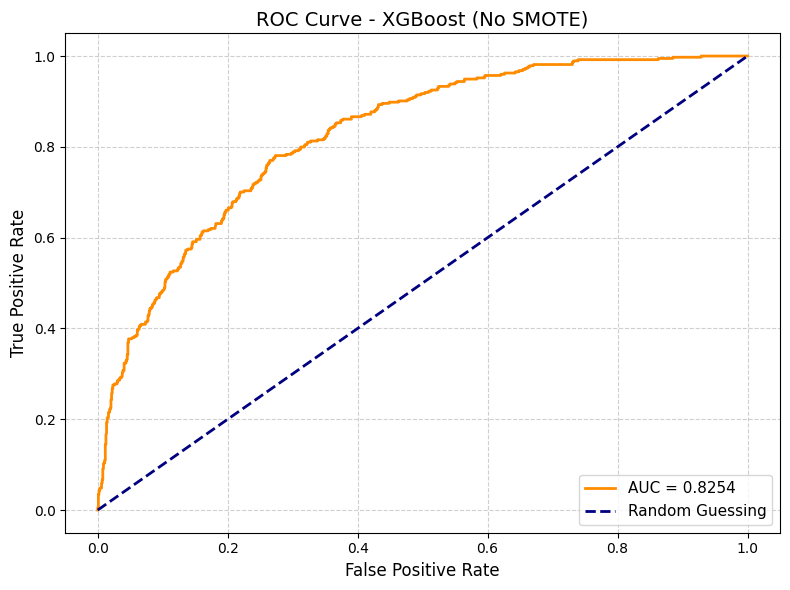

In [60]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predict
y_pred = xgb_model.predict(X_test_proc)
y_proba = xgb_model.predict_proba(X_test_proc)[:, 1]

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix - XGBoost (No SMOTE)", fontsize=14)
plt.tight_layout()
plt.show()

# 3. Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# 4. ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

# 5. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve - XGBoost (No SMOTE)", fontsize=14)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


- XGboost and upscaling

c:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:36:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


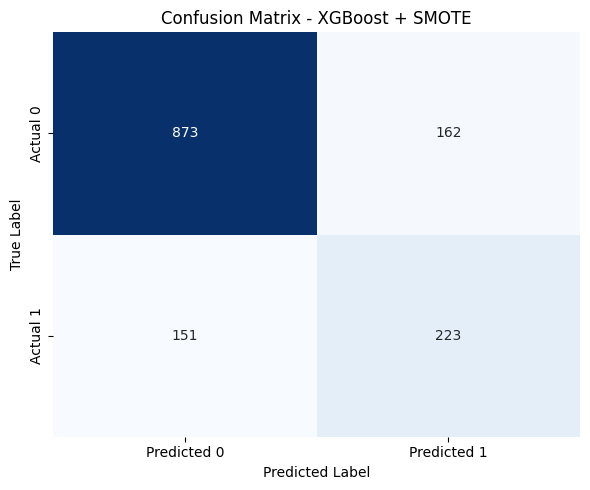


📋 Classification Report (XGBoost + SMOTE):

              precision    recall  f1-score   support

           0     0.8525    0.8435    0.8480      1035
           1     0.5792    0.5963    0.5876       374

    accuracy                         0.7779      1409
   macro avg     0.7159    0.7199    0.7178      1409
weighted avg     0.7800    0.7779    0.7789      1409



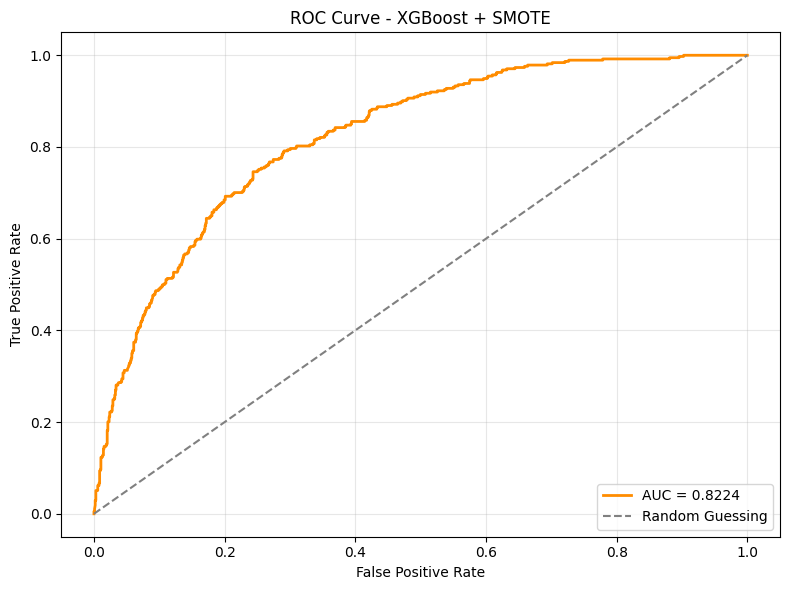

✅ Accuracy Score: 0.7779
✅ ROC-AUC Score: 0.8224


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_resampled, y_resampled)

X_test_processed = preprocessor.transform(X_test)
y_pred = xgb_model.predict(X_test_processed)
y_prob = xgb_model.predict_proba(X_test_processed)[:, 1]

# 3. Accuracy & ROC-AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - XGBoost + SMOTE")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 5. Classification Report
print("\n📋 Classification Report (XGBoost + SMOTE):\n")
print(classification_report(y_test, y_pred, digits=4))

# 6. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost + SMOTE')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 7. In thêm Accuracy & AUC
print(f"✅ Accuracy Score: {accuracy:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")


# Experiment 1 report
| Mô hình                 | SMOTE | Scaling | Accuracy   | ROC-AUC    | Recall (class 1) | F1-score (class 1) |
| ----------------------- | ----- | ------- | ---------- | ---------- | ---------------- | ------------------ |
| **Logistic Regression** | ✅     | ✅       | 0.7374     | 0.8400     | 0.7941           | 0.6162             |
| **Logistic Regression** | ❌     | ✅       | **0.8055** | **0.8419** | 0.5588           | 0.6040             |
| **XGBoost**             | ❌     | ✅       | 0.7850     | 0.8254     | 0.5428           | 0.5726             |
| **XGBoost**             | ✅     | ✅       | 0.7779     | 0.8224     | **0.5963**       | **0.5876**         |


# Experiment 2 : Feature engineering

In [63]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
# Feature Engineering
df['TotalCharges'] = df['TotalCharges'].fillna(
    df.groupby('Contract')['TotalCharges'].transform('median')
)
df['AvgChargesPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)
df['HasInternetService'] = (df['InternetService'] != 'No').astype(int)
df['TenureGroup'] = pd.cut(df['tenure'], bins=[-1, 12, 24, 48, 60, np.inf],
                           labels=['0-12', '13-24', '25-48', '49-60', '61+'])

service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']
df['NoOfServices'] = df[service_cols].apply(lambda row: sum(val == 'Yes' for val in row), axis=1)
df['Contract_MonthlyCharges'] = df['Contract'] + "_" + pd.cut(df['MonthlyCharges'], bins=3, labels=["Low", "Medium", "High"]).astype(str)
df['IsSeniorWithTechSupport'] = ((df['SeniorCitizen'] == 1) & (df['TechSupport'] == 'Yes')).astype(int)


In [65]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgChargesPerMonth,HasInternetService,TenureGroup,NoOfServices,Contract_MonthlyCharges,IsSeniorWithTechSupport
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Electronic check,29.85,29.85,0,14.925000,1,0-12,1,Month-to-month_Low,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Mailed check,56.95,1889.50,0,53.985714,1,25-48,2,One year_Medium,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Mailed check,53.85,108.15,1,36.050000,1,0-12,2,Month-to-month_Medium,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Bank transfer (automatic),42.30,1840.75,0,40.016304,1,25-48,3,One year_Low,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Electronic check,70.70,151.65,1,50.550000,1,0-12,0,Month-to-month_Medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Mailed check,84.80,1990.50,0,79.620000,1,13-24,5,One year_Medium,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Credit card (automatic),103.20,7362.90,0,100.861644,1,61+,4,One year_High,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Electronic check,29.60,346.45,0,28.870833,1,0-12,1,Month-to-month_Low,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Mailed check,74.40,306.60,1,61.320000,1,0-12,0,Month-to-month_Medium,0


In [66]:
X = df.drop(columns=[tar_col , 'customerID'])
y = df[tar_col]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   5634 non-null   object  
 1   SeniorCitizen            5634 non-null   int64   
 2   Partner                  5634 non-null   object  
 3   Dependents               5634 non-null   object  
 4   tenure                   5634 non-null   int64   
 5   PhoneService             5634 non-null   object  
 6   MultipleLines            5634 non-null   object  
 7   InternetService          5634 non-null   object  
 8   OnlineSecurity           5634 non-null   object  
 9   OnlineBackup             5634 non-null   object  
 10  DeviceProtection         5634 non-null   object  
 11  TechSupport              5634 non-null   object  
 12  StreamingTV              5634 non-null   object  
 13  StreamingMovies          5634 non-null   object  
 14  Contract   

In [80]:
# create pipline for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer 

# numerical and cat columns 
num_features = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


# create numerical pipeline
num_pipline = Pipeline([
    ('imputer' , SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#  categorical pipeline 
cat_pipline = Pipeline([
    ('imputer' , SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))    
])


preprocessor = ColumnTransformer([
    ('num' , num_pipline, num_features),
    ('cat', cat_pipline, cat_features)
]
)
preprocessor
    


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges', 'AvgChargesPerMonth',
                                  'HasInternetService', 'NoOfServices',
                                  'IsSeniorWithTechSupport']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod',
                                  'TenureGroup', 'Contract_MonthlyCharges'])])

In [81]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train
log_reg.fit(X_train_proc, y_train)

# Dự đoán
y_pred = log_reg.predict(X_test_proc)
y_prob = log_reg.predict_proba(X_test_proc)[:, 1]

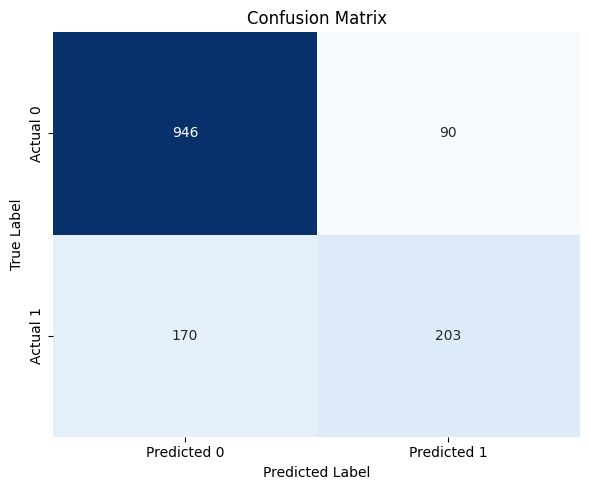


📋 Classification Report:

              precision    recall  f1-score   support

           0     0.8477    0.9131    0.8792      1036
           1     0.6928    0.5442    0.6096       373

    accuracy                         0.8155      1409
   macro avg     0.7703    0.7287    0.7444      1409
weighted avg     0.8067    0.8155    0.8078      1409



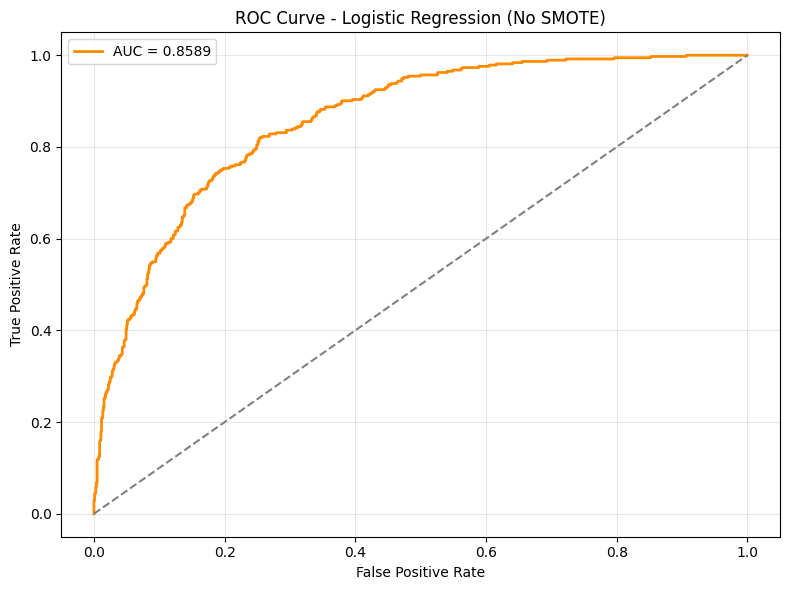

✅ Accuracy Score: 0.8155
✅ ROC-AUC Score: 0.8589


In [82]:
# Accuracy và ROC-AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (No SMOTE)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# In kết quả
print(f"✅ Accuracy Score: {accuracy:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")


- Logistic with smote

In [84]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression


smote_pipeline = ImbPipeline([
    ('preprocess', preprocessor),                 
    ('smote', SMOTE(random_state=42)),            
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  
])
smote_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'AvgChargesPerMonth',
                                                   'HasInternetService',
                                                   'NoOfServices',
                                                   'IsSeniorWithTechSupport']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer...
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'TenureGroup',
                                                   'Contract_MonthlyCharges'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [86]:
# Train
smote_pipeline.fit(X_train, y_train)

# Predict
y_pred = smote_pipeline.predict(X_test)
y_proba = smote_pipeline.predict_proba(X_test)[:, 1]


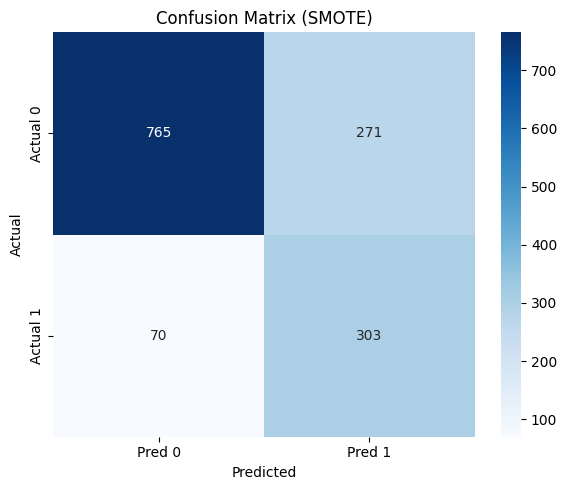


📋 Classification Report (SMOTE):

              precision    recall  f1-score   support

           0     0.9162    0.7384    0.8177      1036
           1     0.5279    0.8123    0.6399       373

    accuracy                         0.7580      1409
   macro avg     0.7220    0.7754    0.7288      1409
weighted avg     0.8134    0.7580    0.7707      1409



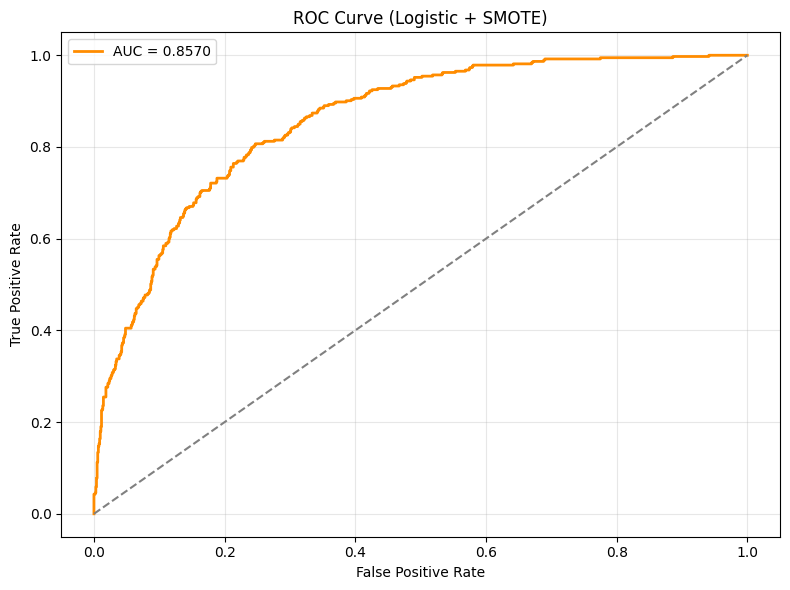

✅ Accuracy Score: 0.7580
✅ ROC-AUC Score: 0.8570


In [88]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification report
print("\n📋 Classification Report (SMOTE):\n")
print(classification_report(y_test, y_pred, digits=4))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic + SMOTE)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✅ Accuracy Score: {smote_pipeline.score(X_test, y_test):.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")


- XGboost without smote

In [89]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),  # Xử lý dữ liệu (imputer + encoding + scaling)
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])


In [91]:
xgb_pipeline.fit(X_train, y_train)

# Dự đoán
y_pred = xgb_pipeline.predict(X_test)
y_proba = xgb_pipeline.predict_proba(X_test)[:, 1]


c:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


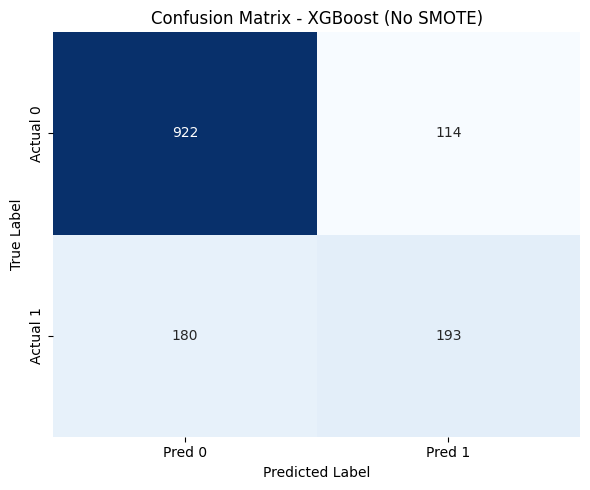


📋 Classification Report:

              precision    recall  f1-score   support

           0     0.8367    0.8900    0.8625      1036
           1     0.6287    0.5174    0.5676       373

    accuracy                         0.7913      1409
   macro avg     0.7327    0.7037    0.7151      1409
weighted avg     0.7816    0.7913    0.7844      1409



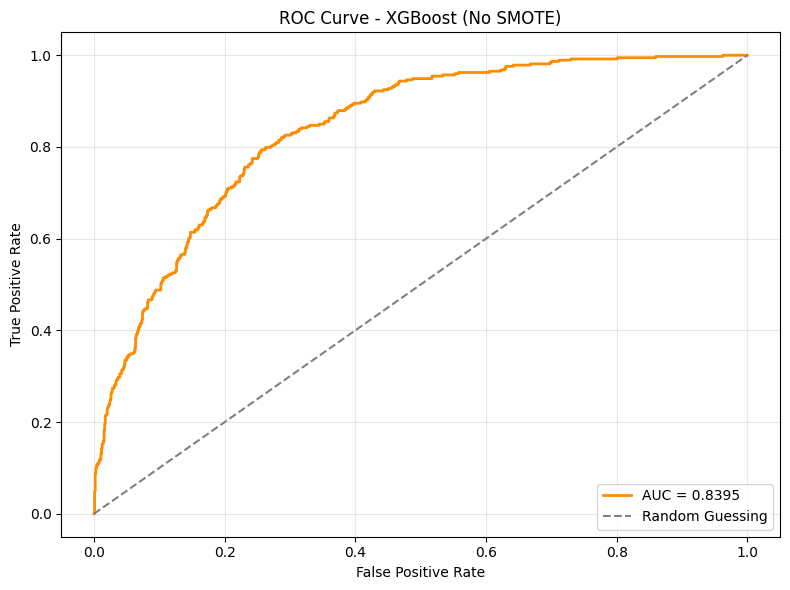

✅ Accuracy Score: 0.7913
✅ ROC-AUC Score: 0.8395


In [92]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - XGBoost (No SMOTE)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Classification report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# ROC Curve
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (No SMOTE)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Accuracy và AUC
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy Score: {accuracy:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")


- XGBOOST with smote

In [93]:
xgb_smote_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),   # pipeline xử lý numeric + categorical
    ('smote', SMOTE(random_state=42)),  # oversampling minority class
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])


In [95]:
xgb_smote_pipeline.fit(X_train, y_train)

y_pred = xgb_smote_pipeline.predict(X_test)
y_proba = xgb_smote_pipeline.predict_proba(X_test)[:, 1]


c:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:10:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


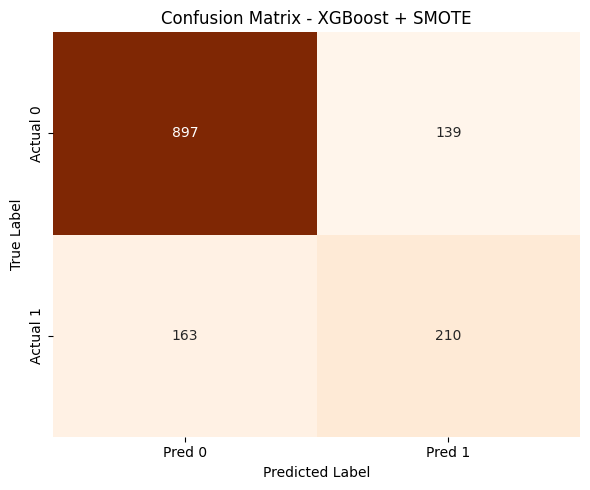


📋 Classification Report (XGBoost + SMOTE):

              precision    recall  f1-score   support

           0     0.8462    0.8658    0.8559      1036
           1     0.6017    0.5630    0.5817       373

    accuracy                         0.7857      1409
   macro avg     0.7240    0.7144    0.7188      1409
weighted avg     0.7815    0.7857    0.7833      1409



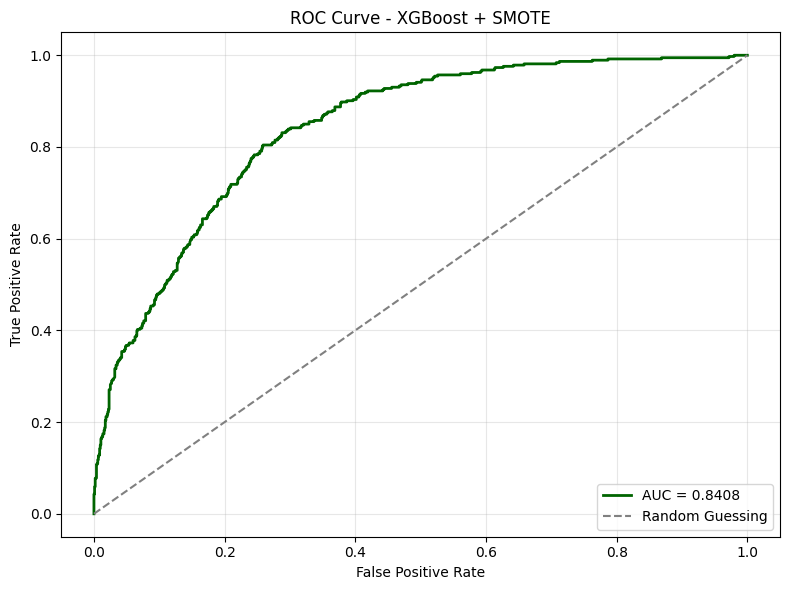

✅ Accuracy Score: 0.7857
✅ ROC-AUC Score: 0.8408


In [96]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - XGBoost + SMOTE")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Classification report
print("\n📋 Classification Report (XGBoost + SMOTE):\n")
print(classification_report(y_test, y_pred, digits=4))

# ROC Curve
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='darkgreen', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost + SMOTE')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Accuracy và ROC-AUC
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy Score: {accuracy:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")


| 🔢 Mô hình              | SMOTE | Accuracy | ROC-AUC | Precision (1) | Recall (1) | F1-score (1) |
| ----------------------- | ----- | -------- | ------- | ------------- | ---------- | ------------ |
| **Logistic Regression** | ✅     | 0.7580   | 0.8570  | 0.5279        | 0.8123     | 0.6399       |
| **Logistic Regression** | ❌     | 0.8155   | 0.8589  | 0.6928        | 0.5442     | 0.6096       |
| **XGBoost**             | ❌     | 0.7913   | 0.8395  | 0.6287        | 0.5174     | 0.5676       |
| **XGBoost**             | ✅     | 0.7857   | 0.8408  | 0.6017        | 0.5630     | 0.5817       |


# Performance Analysis
✅ Logistic Regression:
Without SMOTE: Achieves highest overall accuracy and ROC-AUC, better for general model performance.

With SMOTE: Significantly improves recall for churn class (from 0.54 → 0.81), which is valuable if the goal is to detect more churners even at the cost of some precision.

✅ XGBoost:
Performs well overall but slightly underperforms compared to Logistic Regression in this setup.

SMOTE improves recall, but the gain is moderate and comes with a small drop in overall accuracy.

XGBoost's strength lies in capturing complex patterns and nonlinear relationships, especially when more engineered features are available.

# Recommendations
- Maximize detection of churners (Recall)	=>  Logistic Regression + SMOTE
- Balanced accuracy and AUC performance	=> Logistic Regression (No SMOTE)
- Ready for feature-rich or non-linear data	=> XGBoost (Tuned)